### The first analysis we are to carry out is the Chicago Crimes 2005 to 2007

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Chicago_Crimes_1_4 = pd.read_csv("Chicago_Crimes_2001_to_2004.csv")
try:
    df = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print(f"Error parsing CSV file: {e}")

df.head(-50)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872288,6254213,4673547,HM270592,04/04/2006 10:00:00 PM,033XX W LAWRENCE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,CTA TRAIN,False,...,33.0,14.0,14,1153007.0,1931688.0,2006,04/15/2016 08:55:02 AM,41.968406,-87.712784,"(41.968405527, -87.712783941)"
1872289,6254214,4673551,HM262847,03/31/2006 01:43:00 AM,073XX S PRINCETON AVE,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,APARTMENT,False,...,17.0,69.0,04B,1175561.0,1856390.0,2006,04/15/2016 08:55:02 AM,41.761305,-87.632116,"(41.761304584, -87.632116)"
1872290,6254215,4673552,HM274182,04/05/2006 08:39:36 PM,008XX E 79TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,CLEANING STORE,True,...,8.0,44.0,14,1183126.0,1852805.0,2006,04/15/2016 08:55:02 AM,41.751294,-87.604501,"(41.751294409, -87.604501238)"
1872291,6254216,4673553,HM274517,04/06/2006 01:19:00 AM,036XX N ELSTON AVE,0460,BATTERY,SIMPLE,STREET,False,...,33.0,16.0,08B,1153610.0,1924235.0,2006,04/15/2016 08:55:02 AM,41.947942,-87.710766,"(41.947941997, -87.710765825)"


### Checking if some rows that have unique numbers are duplicated and removing them

In [3]:
df = df.drop_duplicates(subset=['ID', 'Case Number'], keep="first")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338627 entries, 0 to 1872342
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1338627 non-null  int64  
 1   ID                    1338627 non-null  int64  
 2   Case Number           1338627 non-null  object 
 3   Date                  1338627 non-null  object 
 4   Block                 1338627 non-null  object 
 5   IUCR                  1338627 non-null  object 
 6   Primary Type          1338627 non-null  object 
 7   Description           1338627 non-null  object 
 8   Location Description  1338607 non-null  object 
 9   Arrest                1338627 non-null  bool   
 10  Domestic              1338627 non-null  bool   
 11  Beat                  1338627 non-null  int64  
 12  District              1338623 non-null  float64
 13  Ward                  1338618 non-null  float64
 14  Community Area        1338366 non-null 

In [5]:
df.isnull().sum()

Unnamed: 0                 0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description      20
Arrest                     0
Domestic                   0
Beat                       0
District                   4
Ward                       9
Community Area           261
FBI Code                   0
X Coordinate            7471
Y Coordinate            7471
Year                       0
Updated On                 0
Latitude                7471
Longitude               7471
Location                7471
dtype: int64

In [6]:
df.Description.value_counts()

Description
SIMPLE                            147452
DOMESTIC BATTERY SIMPLE           112083
$500 AND UNDER                     80340
TO VEHICLE                         78379
TO PROPERTY                        74581
                                   ...  
BOLITA OR BOLI PUL/WRITER              1
AGG RITUAL MUT:OTH DANG WEAPON         1
CALCULATED CANNABIS CONSPIRACY         1
REGISTER OF SALES BY DEALER            1
PUBLIC DEMONSTRATION                   1
Name: count, Length: 337, dtype: int64

In [7]:
df.Beat.value_counts()

Beat
423     10990
421     10024
624     10002
823      9383
522      8890
        ...  
1215        2
1934        2
1221        2
235         1
1915        1
Name: count, Length: 300, dtype: int64

Text(0.5, 0, 'Ward  %')

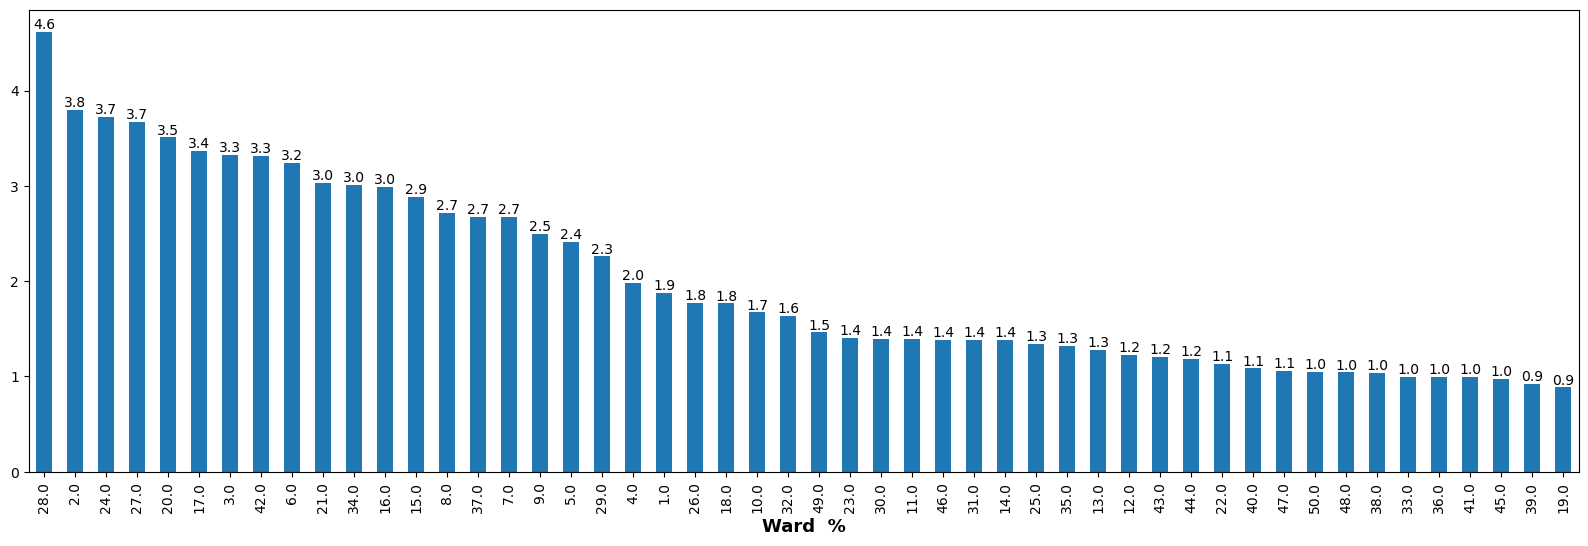

In [8]:
ward = df.Ward.value_counts(normalize = True)*100
bars = ward.plot(kind = "bar", figsize = (20, 6))
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='edge')
plt.xlabel("Ward  %", fontsize = 13, fontweight = "bold")

### important notes for data cleaning 

1. remove the following columns [`longitude`, `latitude`, `location`, `x-cordinate`, `y-cordinate`, etc] because the ward shows the exact location of where they took place. the X and Y coordinate of a row can be converted to it relative longitude and latitude which in turn can changed to chicago ward location


In [9]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [10]:
print (df.Location[1]) 
print (df["X Coordinate"][1], df["Y Coordinate"][1])

(41.775732538, -87.611919814)
1181027.0 1861693.0


In [11]:
df.shape

(1338627, 23)

In [12]:
df.Ward.isnull().sum()

9

In [13]:
df.Ward.head()

0    45.0
1    20.0
2     5.0
3    38.0
4    13.0
Name: Ward, dtype: float64

In [14]:
df.District.value_counts().sort_index()

District
1.0     50289
2.0     61507
3.0     70890
4.0     76415
5.0     61126
6.0     77754
7.0     82395
8.0     94696
9.0     68066
10.0    55898
11.0    84089
12.0    65239
14.0    50574
15.0    59891
16.0    42674
17.0    38113
18.0    55316
19.0    56999
20.0    24209
22.0    44946
24.0    41503
25.0    76014
31.0       20
Name: count, dtype: int64

In [15]:
df.Block.value_counts().sort_index()

Block
0000X E 100TH PL        113
0000X E 100TH ST         81
0000X E 101ST PL         54
0000X E 101ST ST         83
0000X E 102ND PL        128
                       ... 
137XX S BRAINARD AVE     50
137XX S HOXIE AV          2
137XX S INDIANA AVE      12
137XX S JEFFERY AVE       2
137XX S LEYDEN AVE       40
Name: count, Length: 31527, dtype: int64

In [16]:
df_filtered = df[pd.isna(df['Ward'])]
df_filtered

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
178218,179567,4952331,HM521018,08/04/2006 11:00:00 PM,081XX W CATHERINE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,...,NaN,0.0,14,1121002.0,1934728.0,2006,04/15/2016 08:55:02 AM,41.977323,-87.830401,"(41.977323429, -87.830401482)"
208287,209854,5003598,HM612546,09/19/2006 08:00:00 PM,056XX N FAIRVIEW AVE,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,False,...,NaN,10.0,06,1119936.0,1936755.0,2006,04/15/2016 08:55:02 AM,41.982903,-87.834278,"(41.982902855, -87.834278328)"
226269,227962,5035700,HM425939,06/20/2006 11:02:00 AM,032XX W MONROE ST,2017,NARCOTICS,MANU/DELIVER:CRACK,VEHICLE NON-COMMERCIAL,False,...,NaN,NaN,18,1154551.0,1899349.0,2006,04/15/2016 08:55:02 AM,41.879634,-87.707974,"(41.879633871, -87.707973888)"
478350,481691,5504445,HN323686,05/05/2007 01:00:00 AM,081XX W CATHERINE AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE-GARAGE,False,...,NaN,5.0,14,1121014.0,1934728.0,2007,04/15/2016 08:55:02 AM,41.977323,-87.830357,"(41.977323236, -87.830357351)"
478365,481706,5504473,HN323688,04/21/2007 02:00:00 AM,081XX W CATHERINE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,DRIVEWAY - RESIDENTIAL,False,...,NaN,5.0,14,1121014.0,1934728.0,2007,04/15/2016 08:55:02 AM,41.977323,-87.830357,"(41.977323236, -87.830357351)"
531150,534708,5598331,HN404420,06/13/2007 10:45:00 PM,081XX W CATHERINE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,NaN,0.0,14,1121014.0,1934728.0,2007,04/15/2016 08:55:02 AM,41.977323,-87.830357,"(41.977323236, -87.830357351)"
1095986,565978,5646133,HN450096,07/06/2007 11:00:00 AM,058XX N RIVER RD,0580,STALKING,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,...,NaN,NaN,08A,1112570.0,1936925.0,2007,04/15/2016 08:55:02 AM,41.983484,-87.861366,"(41.98348393, -87.86136622)"
1262165,733195,5908727,HN705534,11/13/2007 05:48:00 PM,058XX N RIVER RD,1330,CRIMINAL TRESPASS,TO LAND,CTA PLATFORM,True,...,NaN,NaN,26,1112570.0,1936925.0,2007,04/15/2016 08:55:02 AM,41.983484,-87.861366,"(41.98348393, -87.86136622)"
1370003,5565974,3821248,HL191598,02/20/2005 03:15:00 AM,056XX N FAIRVIEW AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,HIGHWAY/EXPRESSWAY,True,...,NaN,10.0,14,1119964.0,1936805.0,2005,04/15/2016 08:55:02 AM,41.983040,-87.834174,"(41.983039612, -87.834174276)"


In [17]:
wa = df.dropna(subset = ["Ward"])
wa.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


#### 1. We have over 1 million rows in the data set. and from random sampling, we can use a certain percentage of the total number of row
#### 2. there are columns that the ward number is missing and ward is one of the key column in the dataset.

### So the fist set of analysis, we will remove the rows that the wards are `nan`

In [18]:
# getting a copy of the dataset
df1 = df
df1.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [19]:
df1 = df1.dropna(subset = ["Ward"])
df1.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338618 entries, 0 to 1872342
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1338618 non-null  int64  
 1   ID                    1338618 non-null  int64  
 2   Case Number           1338618 non-null  object 
 3   Date                  1338618 non-null  object 
 4   Block                 1338618 non-null  object 
 5   IUCR                  1338618 non-null  object 
 6   Primary Type          1338618 non-null  object 
 7   Description           1338618 non-null  object 
 8   Location Description  1338598 non-null  object 
 9   Arrest                1338618 non-null  bool   
 10  Domestic              1338618 non-null  bool   
 11  Beat                  1338618 non-null  int64  
 12  District              1338614 non-null  float64
 13  Ward                  1338618 non-null  float64
 14  Community Area        1338360 non-null 

In [21]:
# visualize the last updated time 
df1["Case Number"].value_counts()

Case Number
HN217726    4
HM763064    3
HL475827    3
HM154020    3
HN181190    3
           ..
HN272679    1
HN273639    1
HN274128    1
HN273483    1
HM275036    1
Name: count, Length: 1338574, dtype: int64

#### Removing columns that are not needed in the analysis. they include;
1. X coordinate
2. Y coordinate
3. updated on
4. latitude
5. longitude
6. location
7. Unnamed
8. ID
9. Case Number

##### Note: the columns are used to get the wards of the dataset

In [22]:
df1 = df1.drop(columns  = ["X Coordinate", "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "ID", "Case Number", "Unnamed: 0"])
df1.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,2006
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,2006
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,2006
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,2006
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,2006


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338618 entries, 0 to 1872342
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  1338618 non-null  object 
 1   Block                 1338618 non-null  object 
 2   IUCR                  1338618 non-null  object 
 3   Primary Type          1338618 non-null  object 
 4   Description           1338618 non-null  object 
 5   Location Description  1338598 non-null  object 
 6   Arrest                1338618 non-null  bool   
 7   Domestic              1338618 non-null  bool   
 8   Beat                  1338618 non-null  int64  
 9   District              1338614 non-null  float64
 10  Ward                  1338618 non-null  float64
 11  Community Area        1338360 non-null  float64
 12  FBI Code              1338618 non-null  object 
 13  Year                  1338618 non-null  int64  
dtypes: bool(2), float64(3), int64(2), objec

# EDA

##### year counts to know the crime rate in a space of 5 years (2005 - 2007)

In [72]:
cmap = plt.get_cmap('tab20')
categories = df1.Year.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


In [73]:
df1.Year.value_counts()

Year
2005    453665
2006    448034
2007    436919
Name: count, dtype: int64

From the graph distribution, the crime rate increases each year


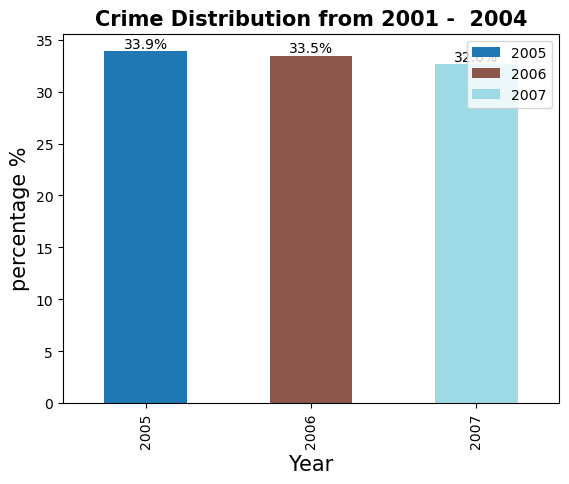

In [74]:
count = df1.Year.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", color = colors)
plt.legend(bars.containers[0],["2005", "2006", "2007"]) 
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.title("Crime Distribution from 2001 -  2004", fontweight = "bold", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15);

print("From the graph distribution, the crime rate increases each year")

#### ward distribution where the crimes occurs

In [75]:
df1.Ward.value_counts()

Ward
28.0    61814
2.0     50854
24.0    49857
27.0    49196
20.0    46989
17.0    45054
3.0     44514
42.0    44376
6.0     43401
21.0    40604
34.0    40261
16.0    40049
15.0    38648
8.0     36412
37.0    35852
7.0     35794
9.0     33417
5.0     32267
29.0    30264
4.0     26580
1.0     25102
26.0    23747
18.0    23642
10.0    22399
32.0    21945
49.0    19593
23.0    18818
30.0    18709
11.0    18709
46.0    18543
31.0    18537
14.0    18527
25.0    17960
35.0    17678
13.0    17124
12.0    16454
43.0    16164
44.0    15862
22.0    15180
40.0    14512
47.0    14148
50.0    13979
48.0    13959
38.0    13910
33.0    13377
36.0    13301
41.0    13296
45.0    13005
39.0    12372
19.0    11863
Name: count, dtype: int64

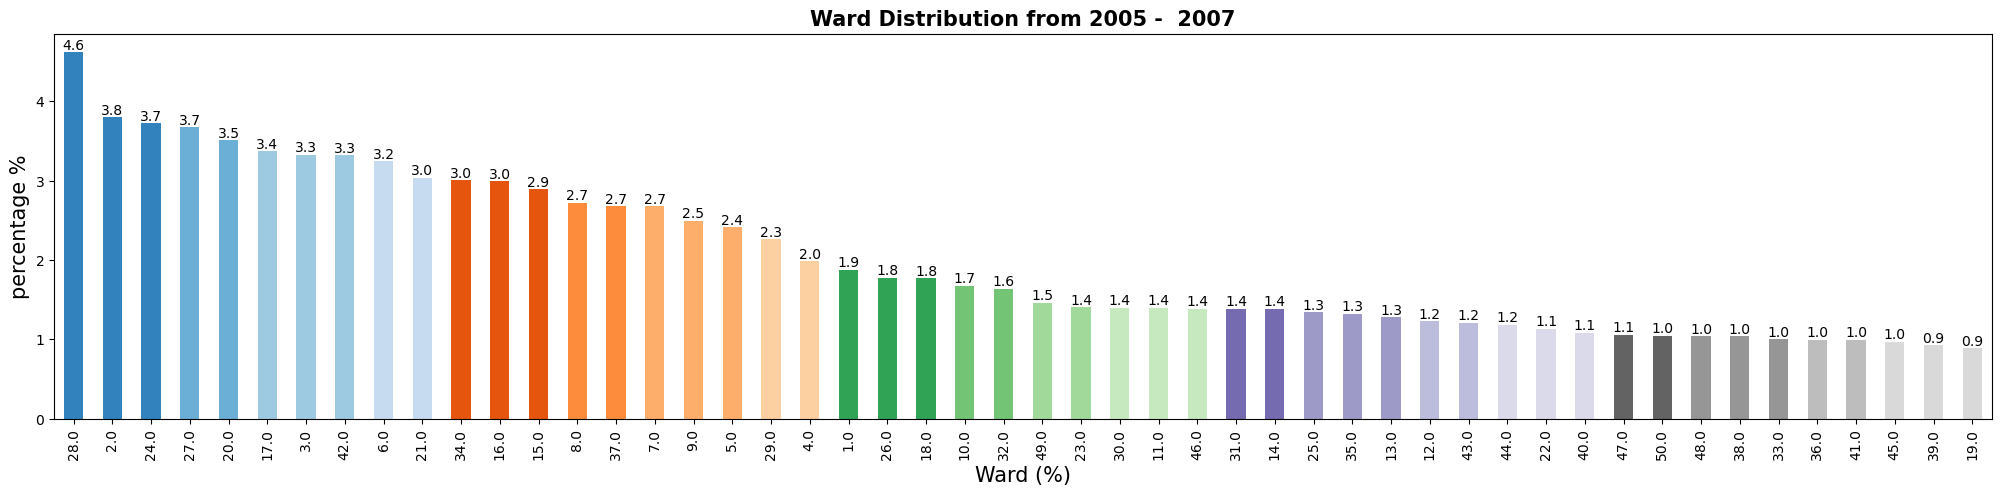

In [76]:
# selecting colors for the graph respectively
cmap = plt.get_cmap('tab20c')
categories = df1.Ward.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


count = df1.Ward.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", color = colors, figsize = (25, 5))
# plt.legend(bars.containers[0],["2003", "2004", "2002", "2001"]) 
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='edge')
plt.title("Ward Distribution from 2005 -  2007", fontweight = "bold", fontsize = 15)
plt.xlabel("Ward (%)", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15);



#### Note: District: Indicates the police district where the incident occurred.

#### Analysing the distribution of the police districts where the incident occur

In [29]:
df1.District.value_counts()

District
8.0     94696
11.0    84088
7.0     82395
6.0     77754
4.0     76415
25.0    76014
3.0     70890
9.0     68066
12.0    65239
2.0     61507
5.0     61126
15.0    59891
19.0    56999
10.0    55898
18.0    55316
14.0    50574
1.0     50289
22.0    44946
16.0    42666
24.0    41503
17.0    38113
20.0    24209
31.0       20
Name: count, dtype: int64

From the distribution, most of the incident occurs in district 8 and there seems to be no incident that occur at district 31 and 21


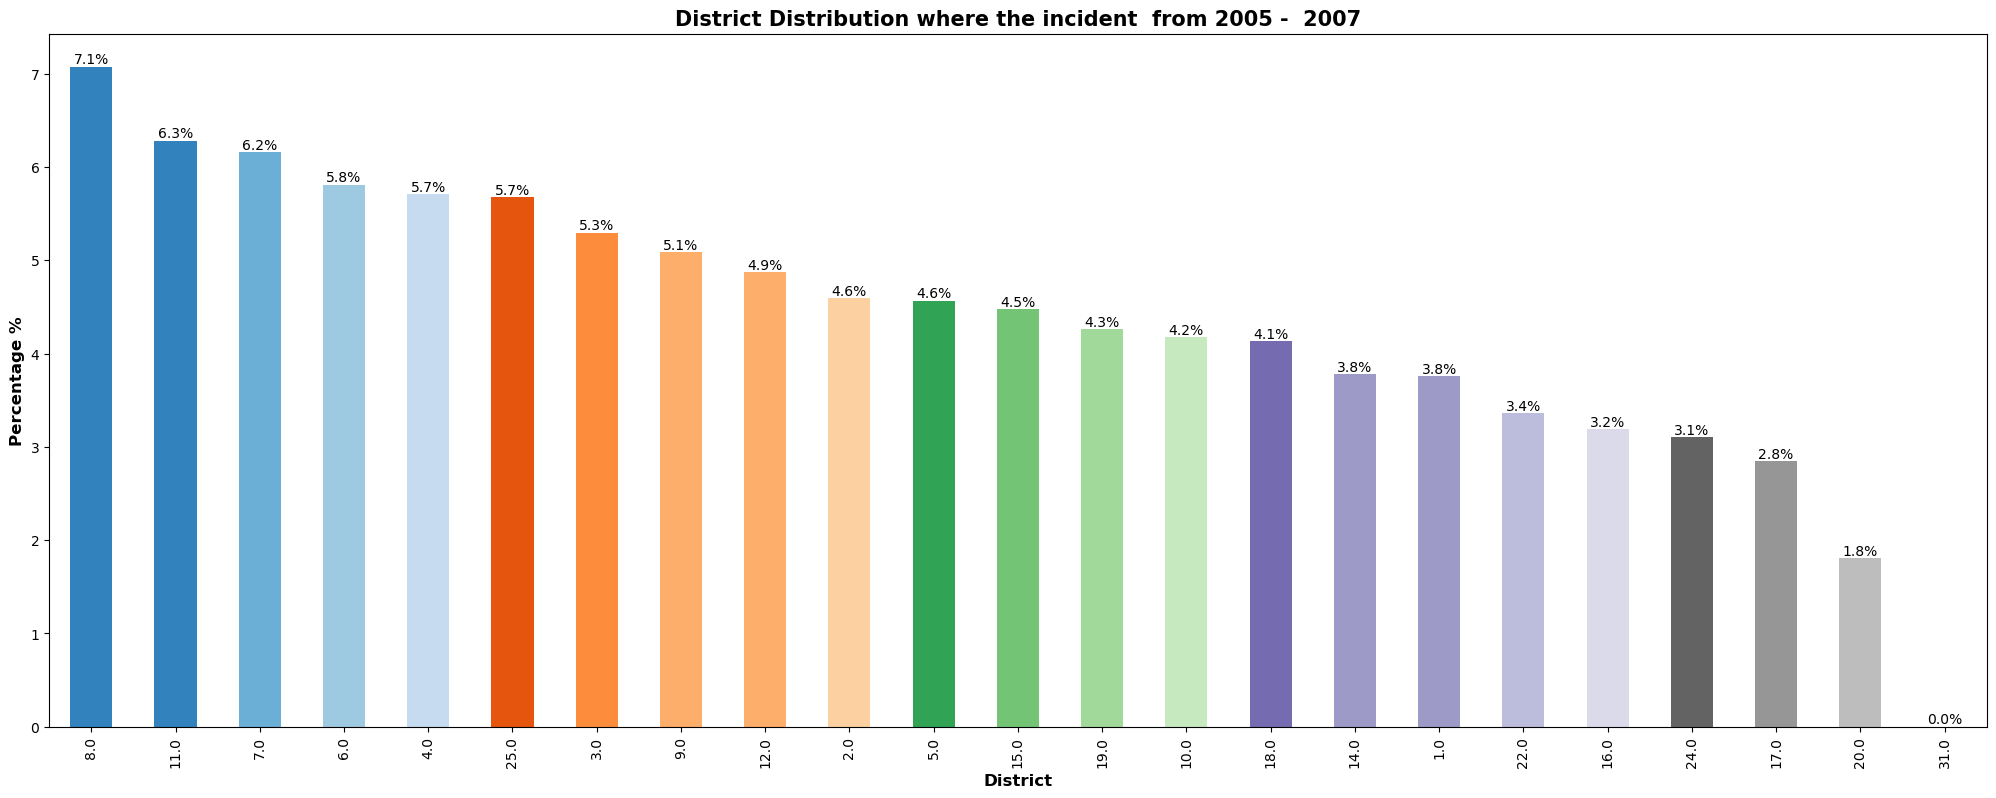

In [77]:
# selecting colors for the graph respectively
cmap = plt.get_cmap('tab20c')
categories = df1.District.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


count = df1.District.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", color = colors, figsize = (25, 9))

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.title("District Distribution where the incident  from 2005 -  2007", fontweight = "bold", fontsize = 15)
plt.xlabel("District", fontsize = 12, fontweight = "bold")
plt.ylabel("Percentage %", fontsize = 12, fontweight = "bold")
print ("From the distribution, most of the incident occurs in district 8 and there seems to be no incident that occur at district 31 and 21")

## Analysising which ward is visited the most by a particular district

 The plot shows the district police that intervane in diffrent incident in the ward


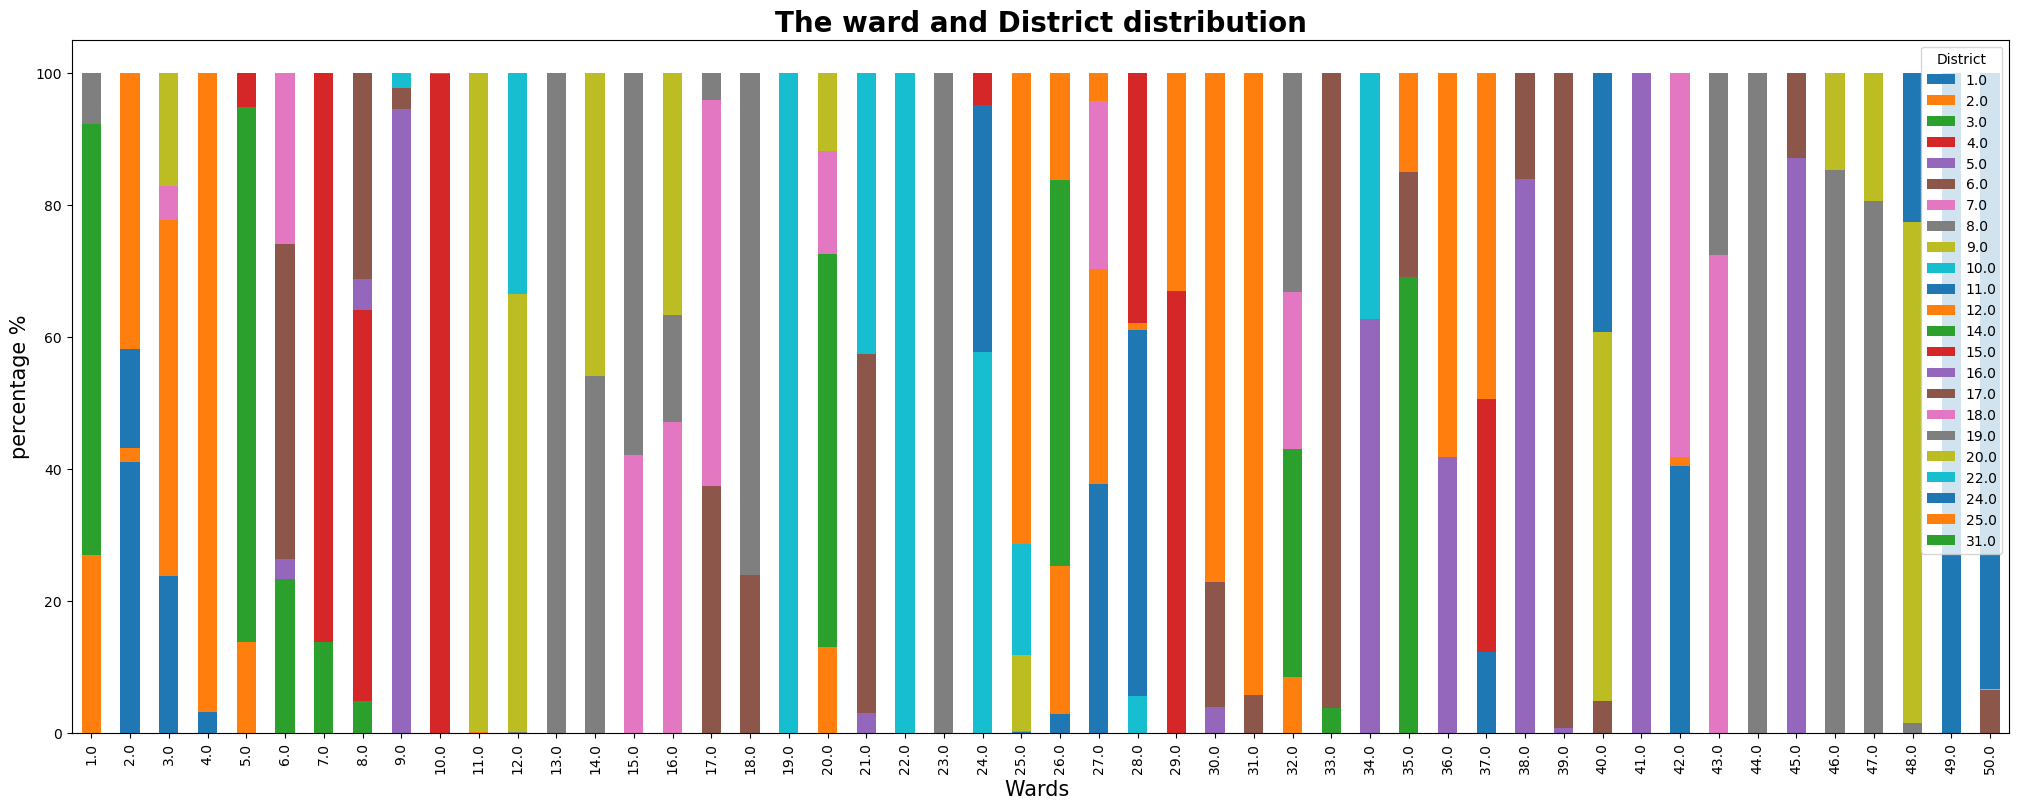

In [31]:
crosstab = pd.crosstab(df["Ward"], df["District"], normalize = "index") * 100 
bars = crosstab.plot(kind = "bar", stacked = True, figsize = (25, 9), )
plt.xlabel("Wards ", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15)
plt.title("The ward and District distribution", fontsize = 20, fontweight = "bold")
print(" The plot shows the district police that intervane in diffrent incident in the ward")
# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center')

##### From the graph above we can observe that there are some wards where only a particular district police intervenes in their situation but there are different police district intervene

In [32]:
df1.columns

Index(['Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'Year'],
      dtype='object')

### analyzing the unique offense type  distribution `primary type`

In [33]:
df1["Primary Type"].unique()

array(['OTHER OFFENSE', 'NARCOTICS', 'ASSAULT', 'BATTERY', 'THEFT',
       'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'BURGLARY',
       'INTIMIDATION', 'PROSTITUTION', 'SEX OFFENSE',
       'PUBLIC PEACE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'LIQUOR LAW VIOLATION', 'KIDNAPPING',
       'STALKING', 'GAMBLING', 'ARSON', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'OBSCENITY', 'HOMICIDE', 'RITUALISM'],
      dtype=object)

In [34]:
print ("The Value Counts of the primary description of the  Crime")
df1["Primary Type"].value_counts()

The Value Counts of the primary description of the  Crime


Primary Type
THEFT                               257077
BATTERY                             244220
NARCOTICS                           166500
CRIMINAL DAMAGE                     165416
OTHER OFFENSE                        81991
ASSAULT                              79325
BURGLARY                             74686
MOTOR VEHICLE THEFT                  62888
ROBBERY                              47465
CRIMINAL TRESPASS                    44858
DECEPTIVE PRACTICE                   41208
PROSTITUTION                         19245
WEAPONS VIOLATION                    11481
PUBLIC PEACE VIOLATION                9113
OFFENSE INVOLVING CHILDREN            8478
SEX OFFENSE                           4884
CRIM SEXUAL ASSAULT                   4524
GAMBLING                              3855
LIQUOR LAW VIOLATION                  3310
ARSON                                 2129
INTERFERENCE WITH PUBLIC OFFICER      2050
HOMICIDE                              1378
KIDNAPPING                            105

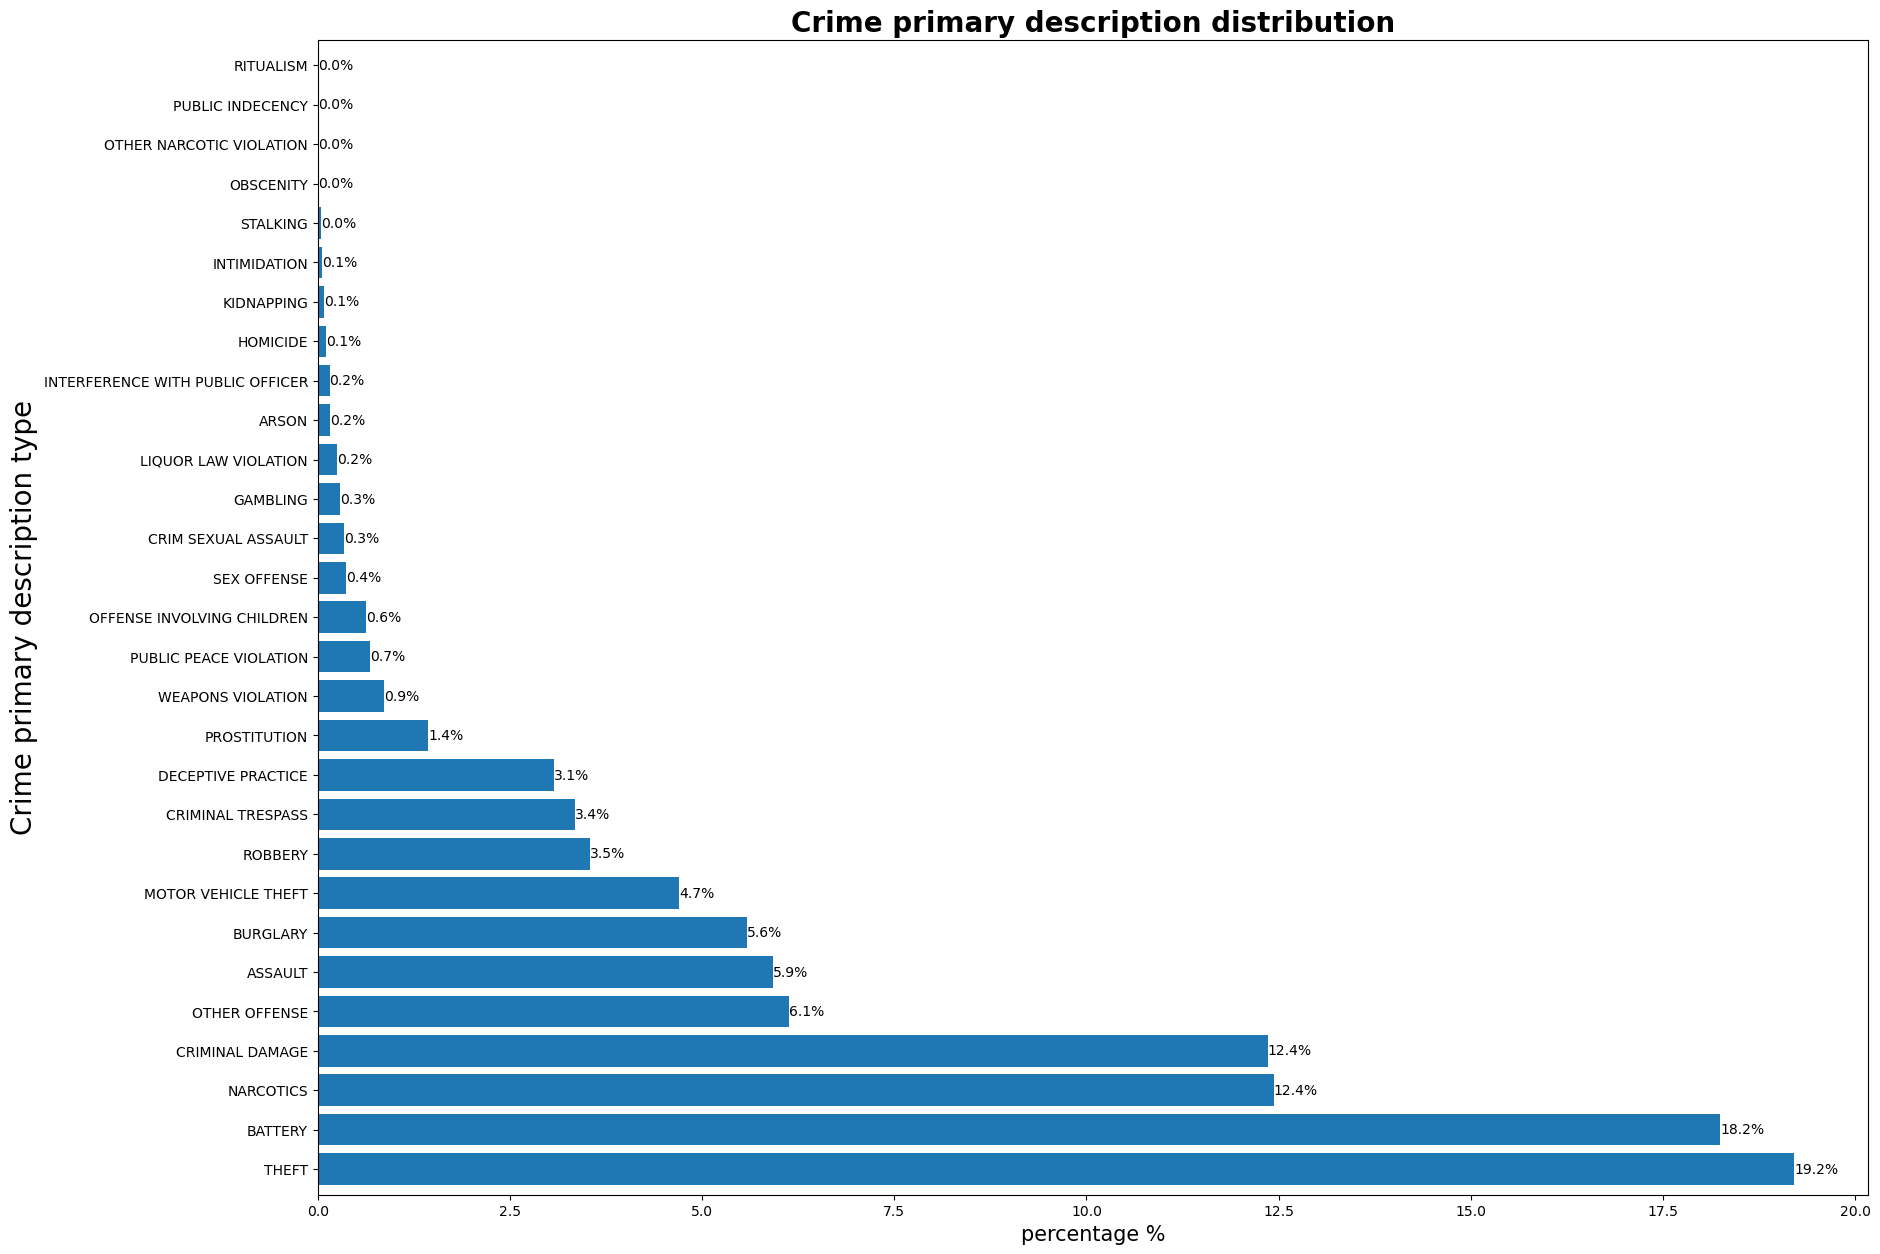

In [35]:
# plotting the primary description of the crime type
count = df1["Primary Type"].value_counts(normalize = True) * 100
bars = count.plot(kind = "barh", figsize = (20, 15), width = 0.8)
plt.xlabel("percentage %", fontsize= 15)
plt.ylabel("Crime primary description type", fontsize= 20)
plt.title("Crime primary description distribution", fontsize= 20, fontweight = "bold")
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')

##### From the graph above, theft is the most.
* next: Analyzing the ward distribution and the type of  crime commited

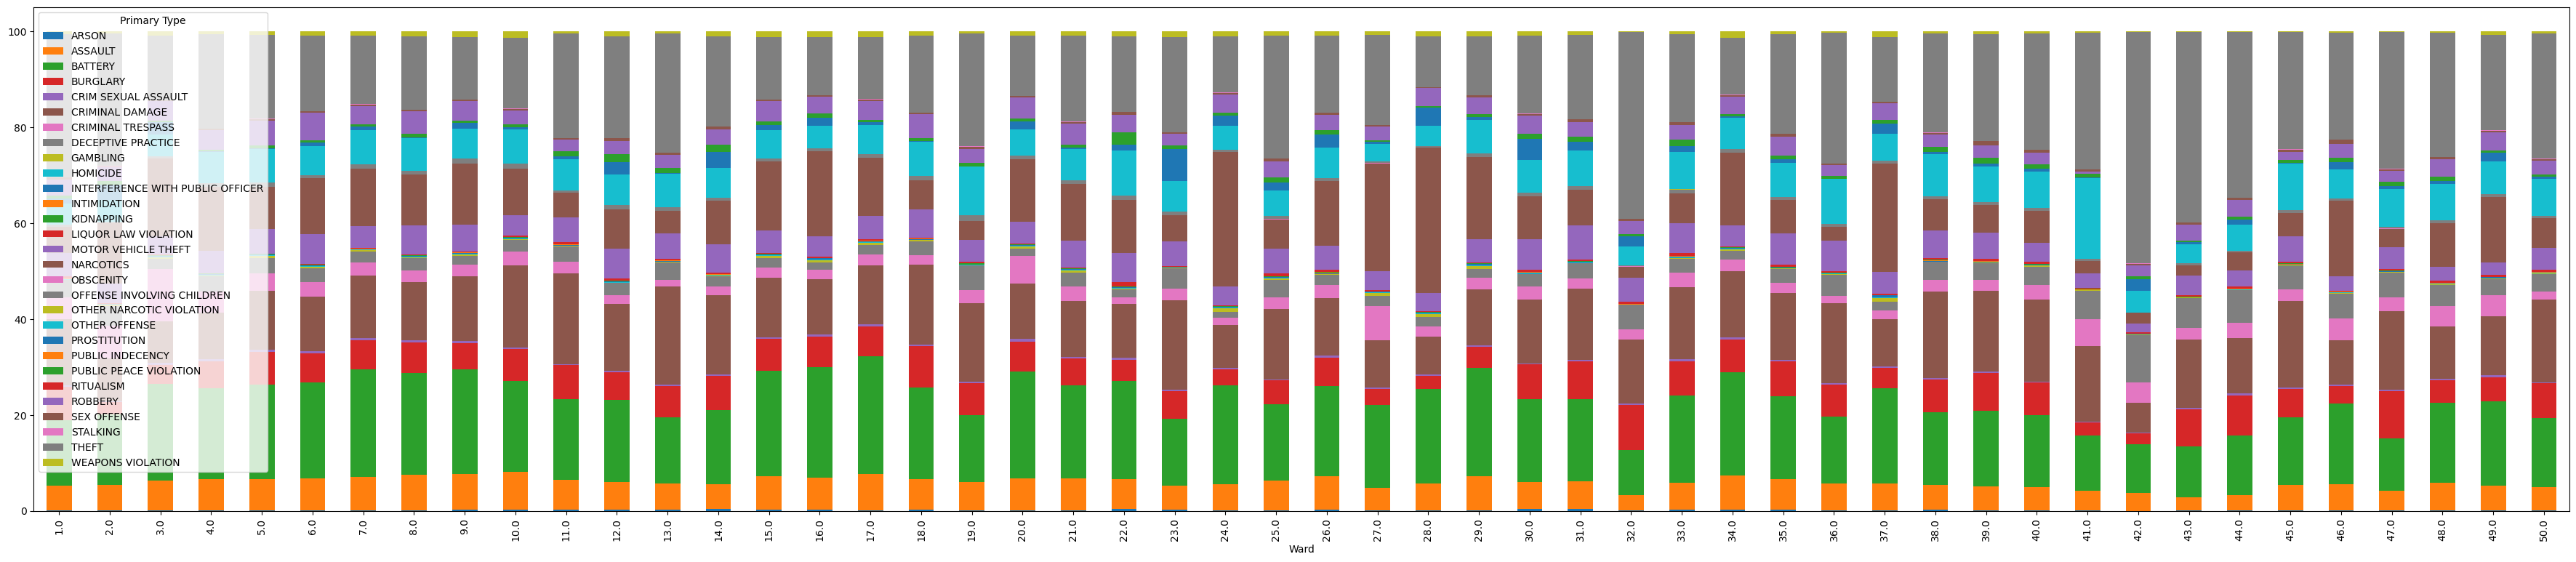

In [36]:
cross = pd.crosstab(df1["Ward"], df1["Primary Type"], normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (45,9), stacked = True)
# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center')

##### From the graph above, Ward 42 is rated highest in Theft

### Analyzing the location description where the incident occur

In [37]:
des_count = df1["Location Description"].value_counts()
des_count 

Location Description
STREET                                          360213
RESIDENCE                                       222732
SIDEWALK                                        145608
APARTMENT                                       128082
OTHER                                            49859
                                                 ...  
AIRPORT PARKING LOT                                  1
RIVER                                                1
YMCA                                                 1
AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA         1
VEHICLE - DELIVERY TRUCK                             1
Name: count, Length: 126, dtype: int64

In [38]:
# Normalizing the Location Description 
des_count1 = df1["Location Description"].value_counts(normalize = True) * 100
des_count1.head(50)

Location Description
STREET                               26.909722
RESIDENCE                            16.639200
SIDEWALK                             10.877650
APARTMENT                             9.568369
OTHER                                 3.724718
PARKING LOT/GARAGE(NON.RESID.)        2.605039
SCHOOL, PUBLIC, BUILDING              2.382194
ALLEY                                 2.337520
VEHICLE NON-COMMERCIAL                2.146574
RESIDENCE-GARAGE                      2.069030
RESIDENCE PORCH/HALLWAY               1.731214
SMALL RETAIL STORE                    1.599211
RESTAURANT                            1.364861
GROCERY FOOD STORE                    1.267371
GAS STATION                           1.147693
CHA PARKING LOT/GROUNDS               1.045273
DEPARTMENT STORE                      1.031826
PARK PROPERTY                         0.771628
COMMERCIAL / BUSINESS OFFICE          0.770134
CHA HALLWAY/STAIRWELL/ELEVATOR        0.625281
CTA PLATFORM                          0

##### From the value count above, removing the outliers (the location description percentage that is greater than 1)
##### Note: the filtration can be adjusted

In [39]:
des_count_filtered = des_count1[des_count1 > 1]

# Show the filtered value counts
print(des_count_filtered)

Location Description
STREET                            26.909722
RESIDENCE                         16.639200
SIDEWALK                          10.877650
APARTMENT                          9.568369
OTHER                              3.724718
PARKING LOT/GARAGE(NON.RESID.)     2.605039
SCHOOL, PUBLIC, BUILDING           2.382194
ALLEY                              2.337520
VEHICLE NON-COMMERCIAL             2.146574
RESIDENCE-GARAGE                   2.069030
RESIDENCE PORCH/HALLWAY            1.731214
SMALL RETAIL STORE                 1.599211
RESTAURANT                         1.364861
GROCERY FOOD STORE                 1.267371
GAS STATION                        1.147693
CHA PARKING LOT/GROUNDS            1.045273
DEPARTMENT STORE                   1.031826
Name: proportion, dtype: float64


In [40]:
des_count_filtered.index

Index(['STREET', 'RESIDENCE', 'SIDEWALK', 'APARTMENT', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'SCHOOL, PUBLIC, BUILDING', 'ALLEY',
       'VEHICLE NON-COMMERCIAL', 'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY',
       'SMALL RETAIL STORE', 'RESTAURANT', 'GROCERY FOOD STORE', 'GAS STATION',
       'CHA PARKING LOT/GROUNDS', 'DEPARTMENT STORE'],
      dtype='object', name='Location Description')

Text(0.5, 1.0, 'Crime Location Description')

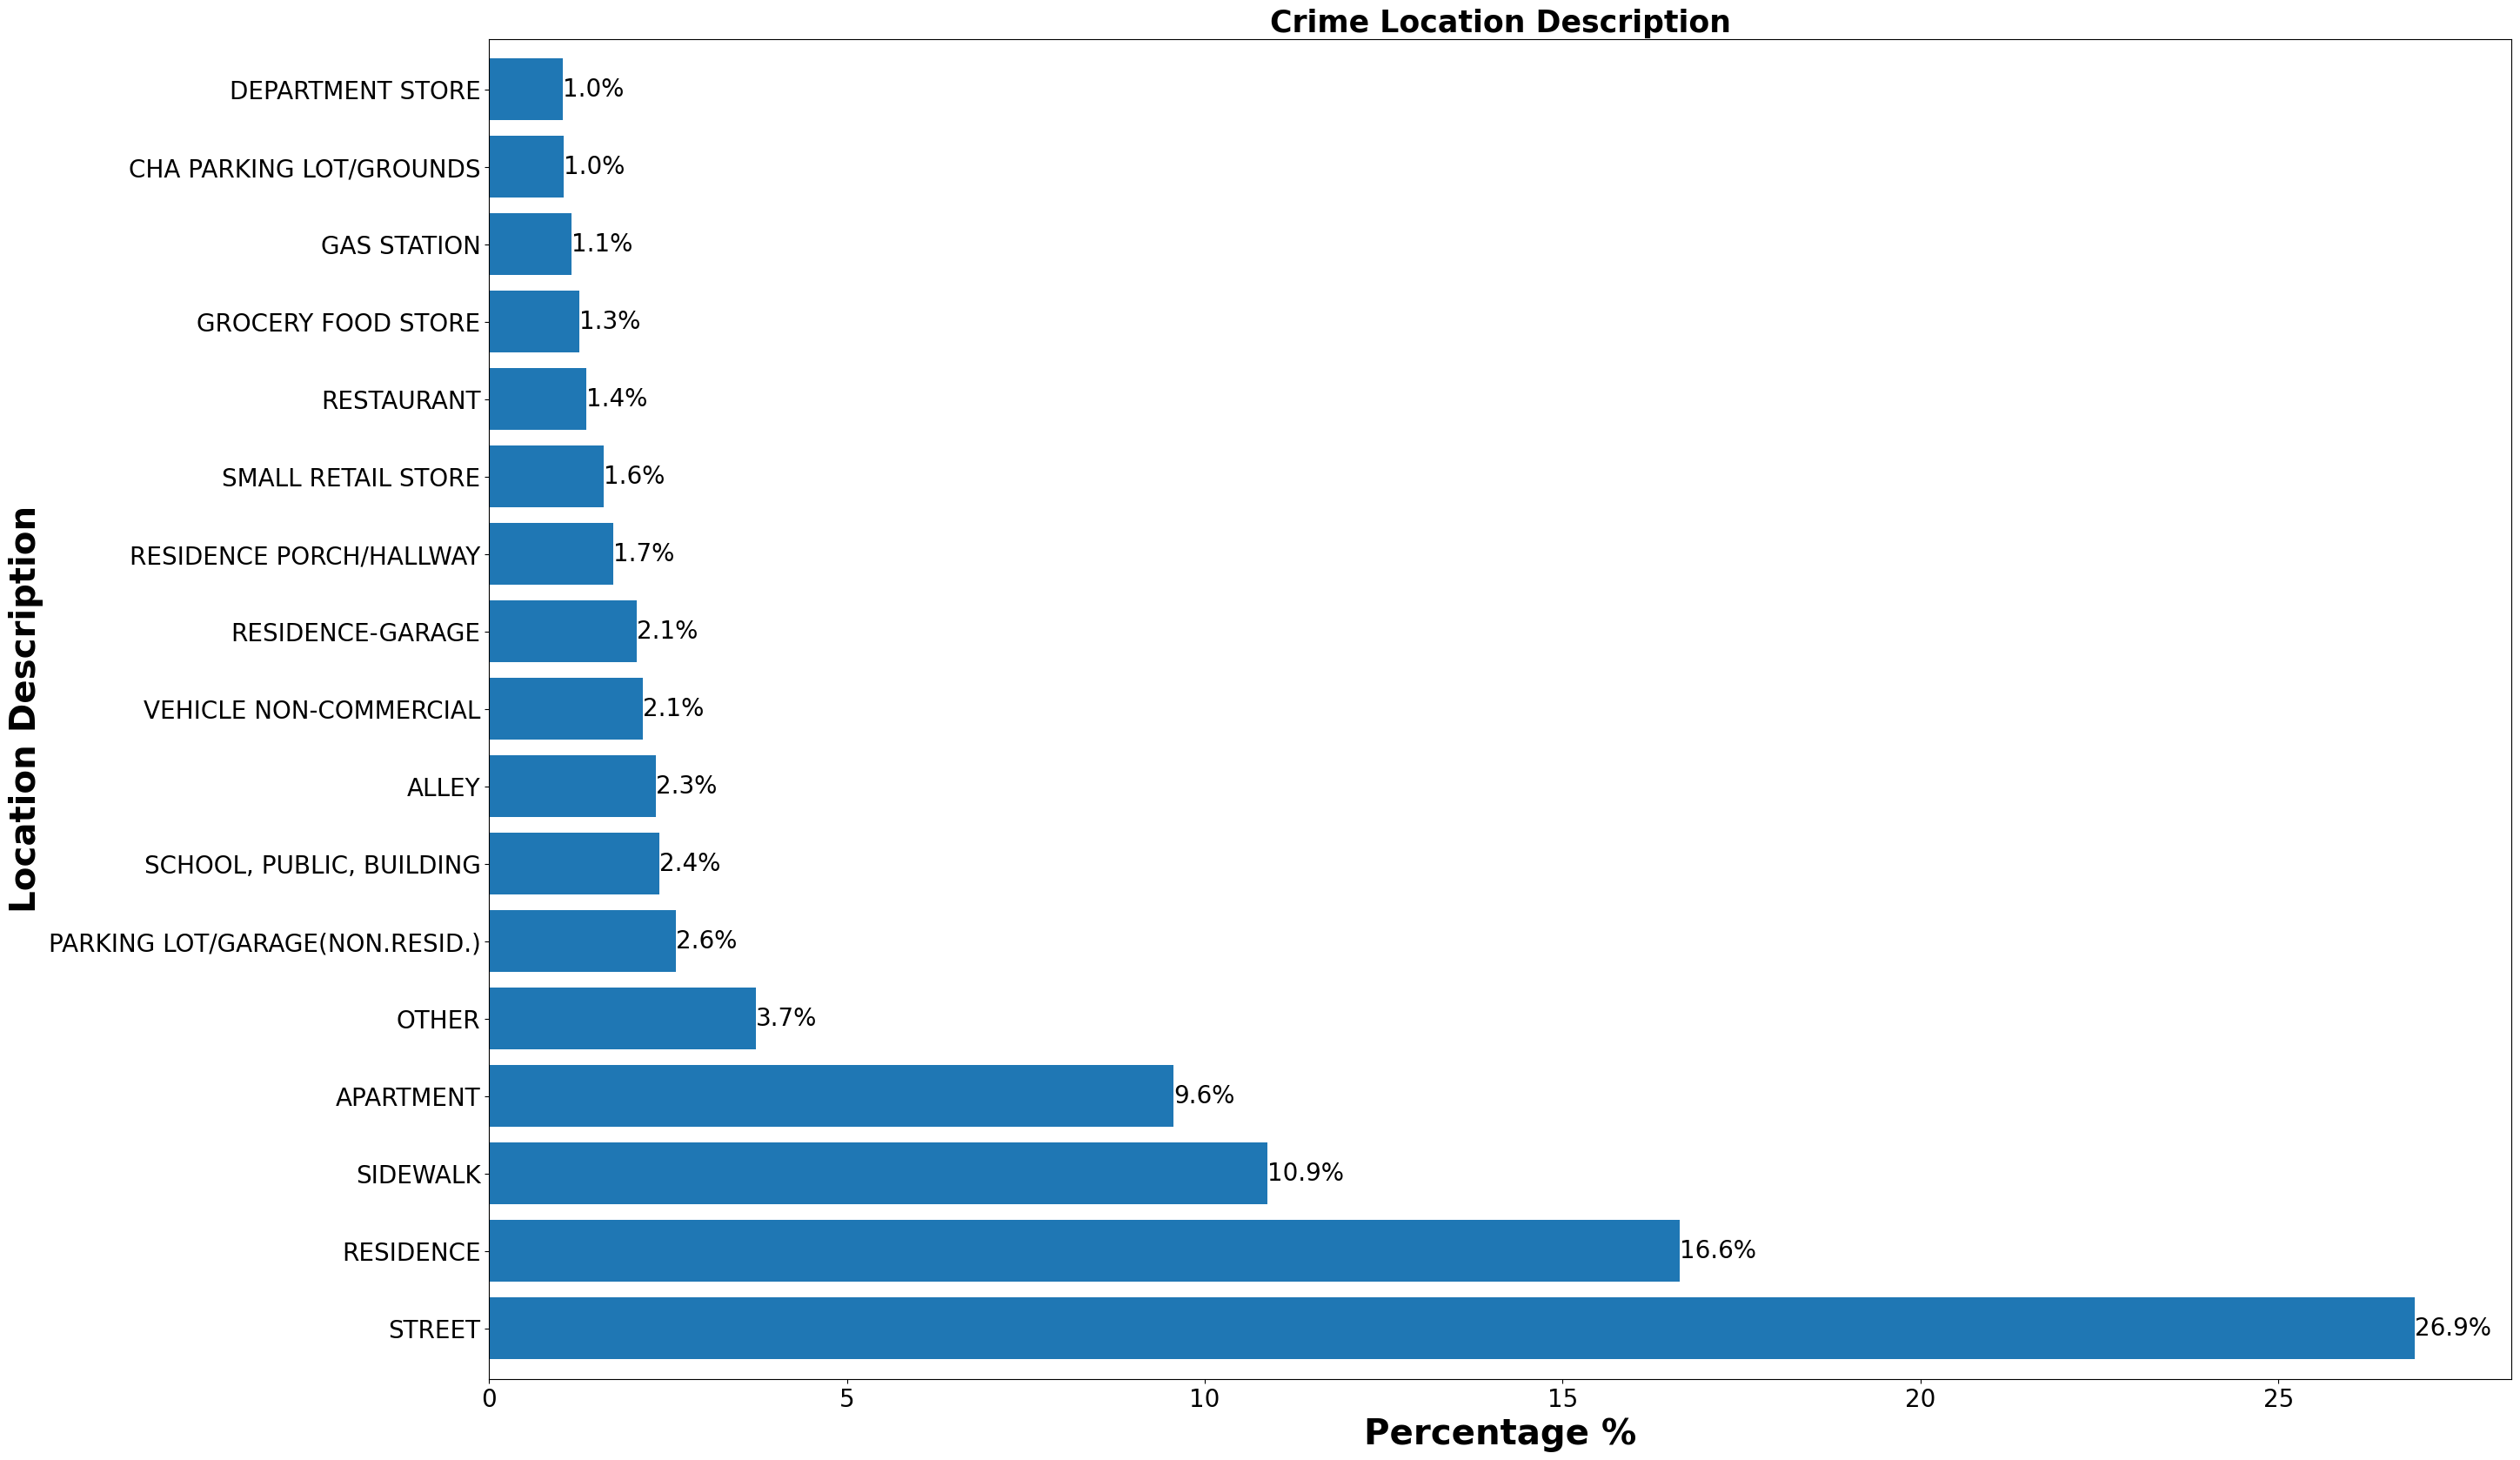

In [41]:
bars = des_count_filtered.plot(kind = "barh", figsize = (30, 20), width = 0.8)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  # Increase y-axis tick label size
plt.xlabel("Percentage %",fontsize=29, fontweight = "bold")  
plt.ylabel("Location Description",fontsize=29, fontweight = "bold")  
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=20)

plt.title("Crime Location Description", fontsize= 25, fontweight = "bold")

#### using the filtered location description to compare with:
1. the crime type `Primary Type` column
2. the ward where crime occurs most `Ward`
3. analyze to know at what rate the crime increases or decreases annually
4. what crime causes Arrest

In [42]:
des_index = des_count_filtered.index
des_index

Index(['STREET', 'RESIDENCE', 'SIDEWALK', 'APARTMENT', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'SCHOOL, PUBLIC, BUILDING', 'ALLEY',
       'VEHICLE NON-COMMERCIAL', 'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY',
       'SMALL RETAIL STORE', 'RESTAURANT', 'GROCERY FOOD STORE', 'GAS STATION',
       'CHA PARKING LOT/GROUNDS', 'DEPARTMENT STORE'],
      dtype='object', name='Location Description')

In [43]:
selected_col = df1[[ 'Ward', 'Location Description']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Ward,Location Description
0,45.0,RESIDENCE
1,20.0,SIDEWALK
2,5.0,OTHER
3,38.0,RESIDENCE
4,13.0,ALLEY
...,...,...
1872336,16.0,RESIDENCE
1872337,14.0,ALLEY
1872338,28.0,"SCHOOL, PUBLIC, BUILDING"
1872339,38.0,"SCHOOL, PUBLIC, BUILDING"


In [44]:
cross = pd.crosstab(filtered_df["Ward"], filtered_df["Location Description"], normalize = "index") * 100
cross

Location Description,ALLEY,APARTMENT,CHA PARKING LOT/GROUNDS,DEPARTMENT STORE,GAS STATION,GROCERY FOOD STORE,OTHER,PARKING LOT/GARAGE(NON.RESID.),RESIDENCE,RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESTAURANT,"SCHOOL, PUBLIC, BUILDING",SIDEWALK,SMALL RETAIL STORE,STREET,VEHICLE NON-COMMERCIAL
Ward,,,,,,,,,,,,,,,,,
1.0,2.464196,8.615594,2.873380,2.373267,0.581950,1.377586,4.441919,2.955217,12.902932,1.595817,3.659923,2.491475,3.623551,10.361446,2.718800,29.393044,7.569902
2.0,1.910469,4.768490,4.847880,0.834870,2.020590,2.776070,7.229564,6.796763,10.791846,1.175476,0.919381,3.331797,4.425323,11.747081,1.495595,33.817353,1.111453
3.0,1.907008,9.350310,12.095720,0.380833,2.489627,1.179446,3.686125,2.211107,14.653555,1.972375,0.693458,1.151026,3.018246,9.822088,1.551754,32.510089,1.327232
4.0,1.548514,13.641246,6.601325,0.228249,0.402793,2.313820,4.600788,3.580380,18.376298,2.457035,0.845865,1.512710,4.265127,7.111529,2.027390,29.439671,1.047261
5.0,1.889348,23.569445,0.030473,0.226857,2.068802,3.192930,3.964922,2.464956,13.448906,2.962687,0.677186,1.171531,2.986389,11.390262,1.290039,27.635945,1.029322
6.0,2.328101,13.988763,0.037794,1.723399,3.736552,0.690368,3.366172,2.015672,18.486230,1.980398,2.050946,1.473960,3.202399,11.489330,1.705762,30.449243,1.274912
7.0,1.895236,17.931159,0.255301,0.360425,0.621734,0.801946,3.360966,1.937286,23.013156,2.282694,1.414669,0.528624,2.790293,12.272482,1.504776,28.155223,0.874031
8.0,2.592637,13.807506,0.023868,0.513157,1.020347,0.665314,3.538397,2.139149,22.701235,1.819918,1.873620,1.270959,5.349365,10.639060,1.142670,29.807864,1.094934
9.0,2.449235,6.533492,2.732727,0.164821,1.420754,0.705432,2.907437,1.964662,27.670095,1.789953,2.333861,0.537315,3.148075,10.815533,1.433940,32.067511,1.325158


From the graph it observed that in most wards, the crime locations are;
Grocery food stores and Residnce


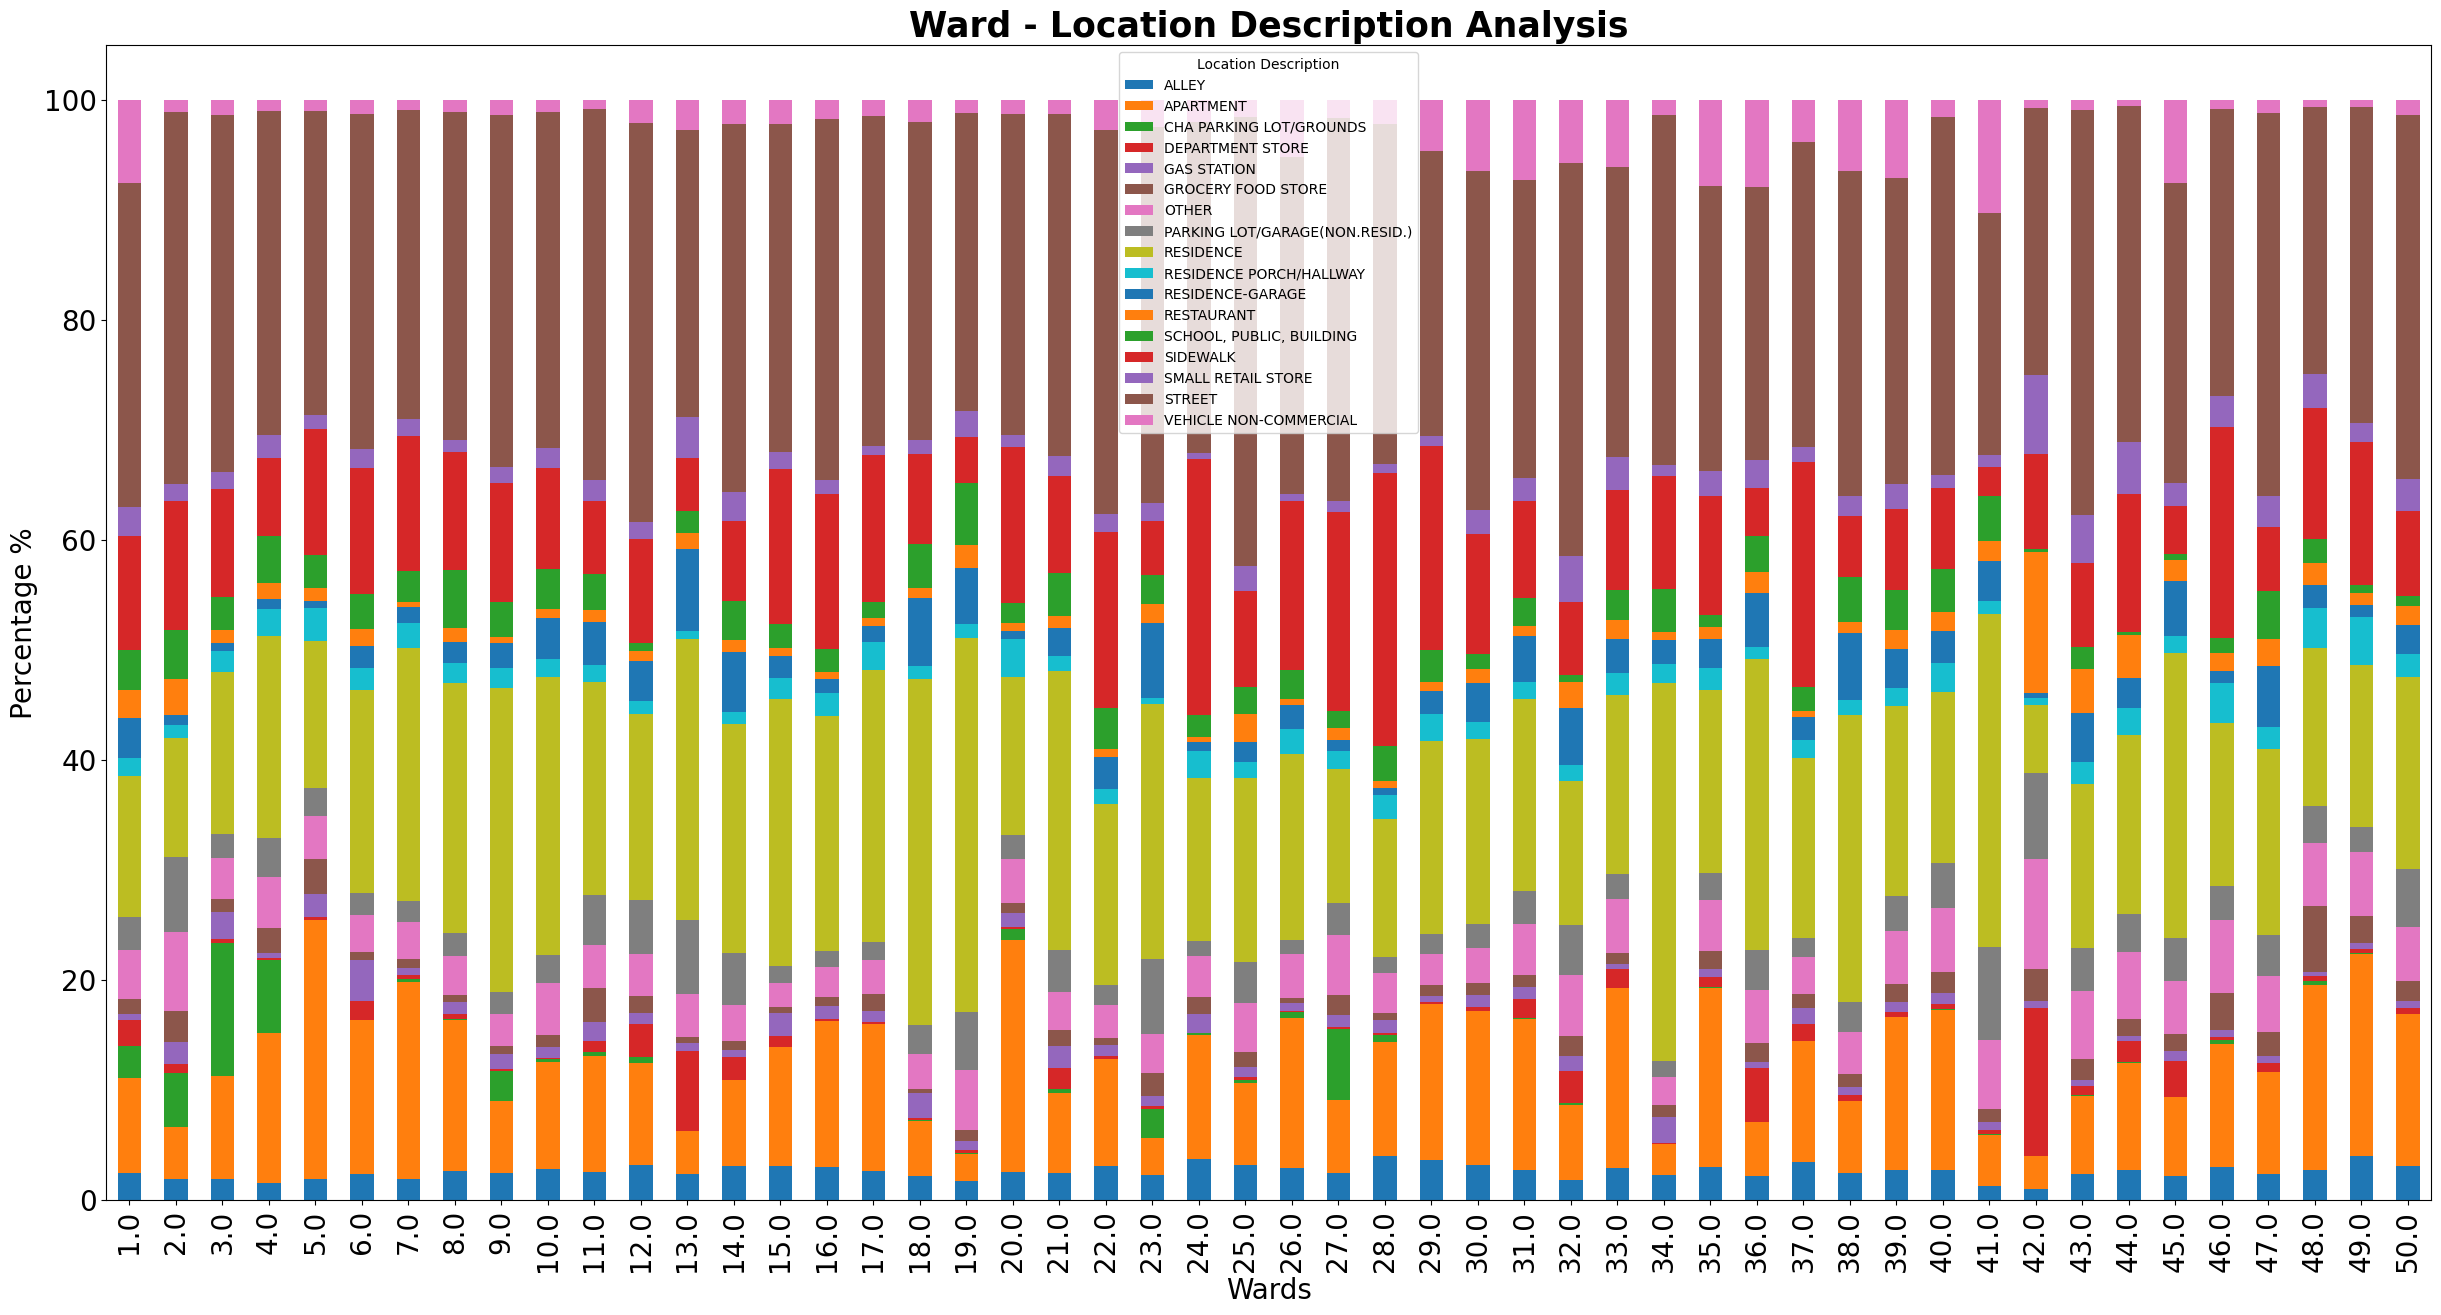

In [45]:
cross.plot(kind = "bar", figsize = (30, 15), stacked = True)
plt.ylabel("Percentage %", fontsize = 20)
plt.xlabel("Wards", fontsize = 20)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  # Increase y-axis tick label size

plt.title("Ward - Location Description Analysis", fontsize = 25, fontweight = "bold")
print ("From the graph it observed that in most wards, the crime locations are;")
print("Grocery food stores and Residnce" )

##### Analysing the location description and the primary crime type. ie the location where a particular type of crime occur

In [79]:
selected_col = df1[[ 'Primary Type', 'Location Description']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Primary Type,Location Description
0,OTHER OFFENSE,RESIDENCE
1,NARCOTICS,SIDEWALK
2,ASSAULT,OTHER
3,BATTERY,RESIDENCE
4,NARCOTICS,ALLEY
...,...,...
1872336,CRIMINAL DAMAGE,RESIDENCE
1872337,ASSAULT,ALLEY
1872338,BATTERY,"SCHOOL, PUBLIC, BUILDING"
1872339,CRIMINAL DAMAGE,"SCHOOL, PUBLIC, BUILDING"


In [80]:
cross = pd.crosstab(filtered_df["Primary Type"], filtered_df["Location Description"], normalize = "index") * 100
cross

Location Description,ALLEY,APARTMENT,CHA PARKING LOT/GROUNDS,DEPARTMENT STORE,GAS STATION,GROCERY FOOD STORE,OTHER,PARKING LOT/GARAGE(NON.RESID.),RESIDENCE,RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESTAURANT,"SCHOOL, PUBLIC, BUILDING",SIDEWALK,SMALL RETAIL STORE,STREET,VEHICLE NON-COMMERCIAL
Primary Type,,,,,,,,,,,,,,,,,
ARSON,2.697095,7.883817,0.051867,0.000000,0.259336,0.622407,3.163900,0.414938,23.651452,6.535270,11.099585,0.881743,2.022822,0.466805,0.933610,3.319502,35.995851
ASSAULT,2.537715,12.908698,0.874881,0.361730,1.347373,1.131456,3.788346,1.681061,18.973978,4.609949,0.152824,1.960070,7.878134,15.981998,1.416073,24.026975,0.368740
BATTERY,2.519167,20.584821,0.841372,0.135429,0.776132,0.474678,2.579908,1.276906,22.402095,2.679793,0.124631,0.888615,5.348787,17.069505,0.432384,20.911921,0.953855
BURGLARY,0.175543,29.974710,0.046117,0.236537,0.105623,1.027968,4.507587,0.434395,36.169295,0.428444,20.992264,2.167510,0.684320,0.041654,2.735793,0.236537,0.035704
CRIM SEXUAL ASSAULT,8.080301,27.954831,0.150565,0.050188,0.376412,0.125471,4.316186,0.803011,38.895859,2.358846,1.480552,0.200753,1.003764,2.885822,0.125471,5.370138,5.821832
CRIMINAL DAMAGE,1.953994,10.368408,0.365786,0.160031,0.684503,0.421595,4.369928,4.364548,20.943243,1.515590,5.576886,1.391196,1.533744,2.487208,1.219061,37.534040,5.110240
CRIMINAL TRESPASS,0.476841,9.721207,13.316591,0.718441,8.767524,4.240710,9.555902,4.599930,17.783005,10.449185,1.564040,5.343803,3.356963,2.136249,2.352418,4.844709,0.772483
DECEPTIVE PRACTICE,0.838605,8.281222,0.097596,3.495391,4.370143,3.358034,11.534430,2.125429,37.202241,0.354238,0.097596,5.338876,0.560275,3.661666,5.121995,13.171878,0.390385
GAMBLING,6.617647,0.367647,2.941176,0.000000,0.197964,0.141403,3.846154,0.791855,0.989819,4.100679,0.197964,2.092760,0.650452,63.037330,0.509050,13.489819,0.028281


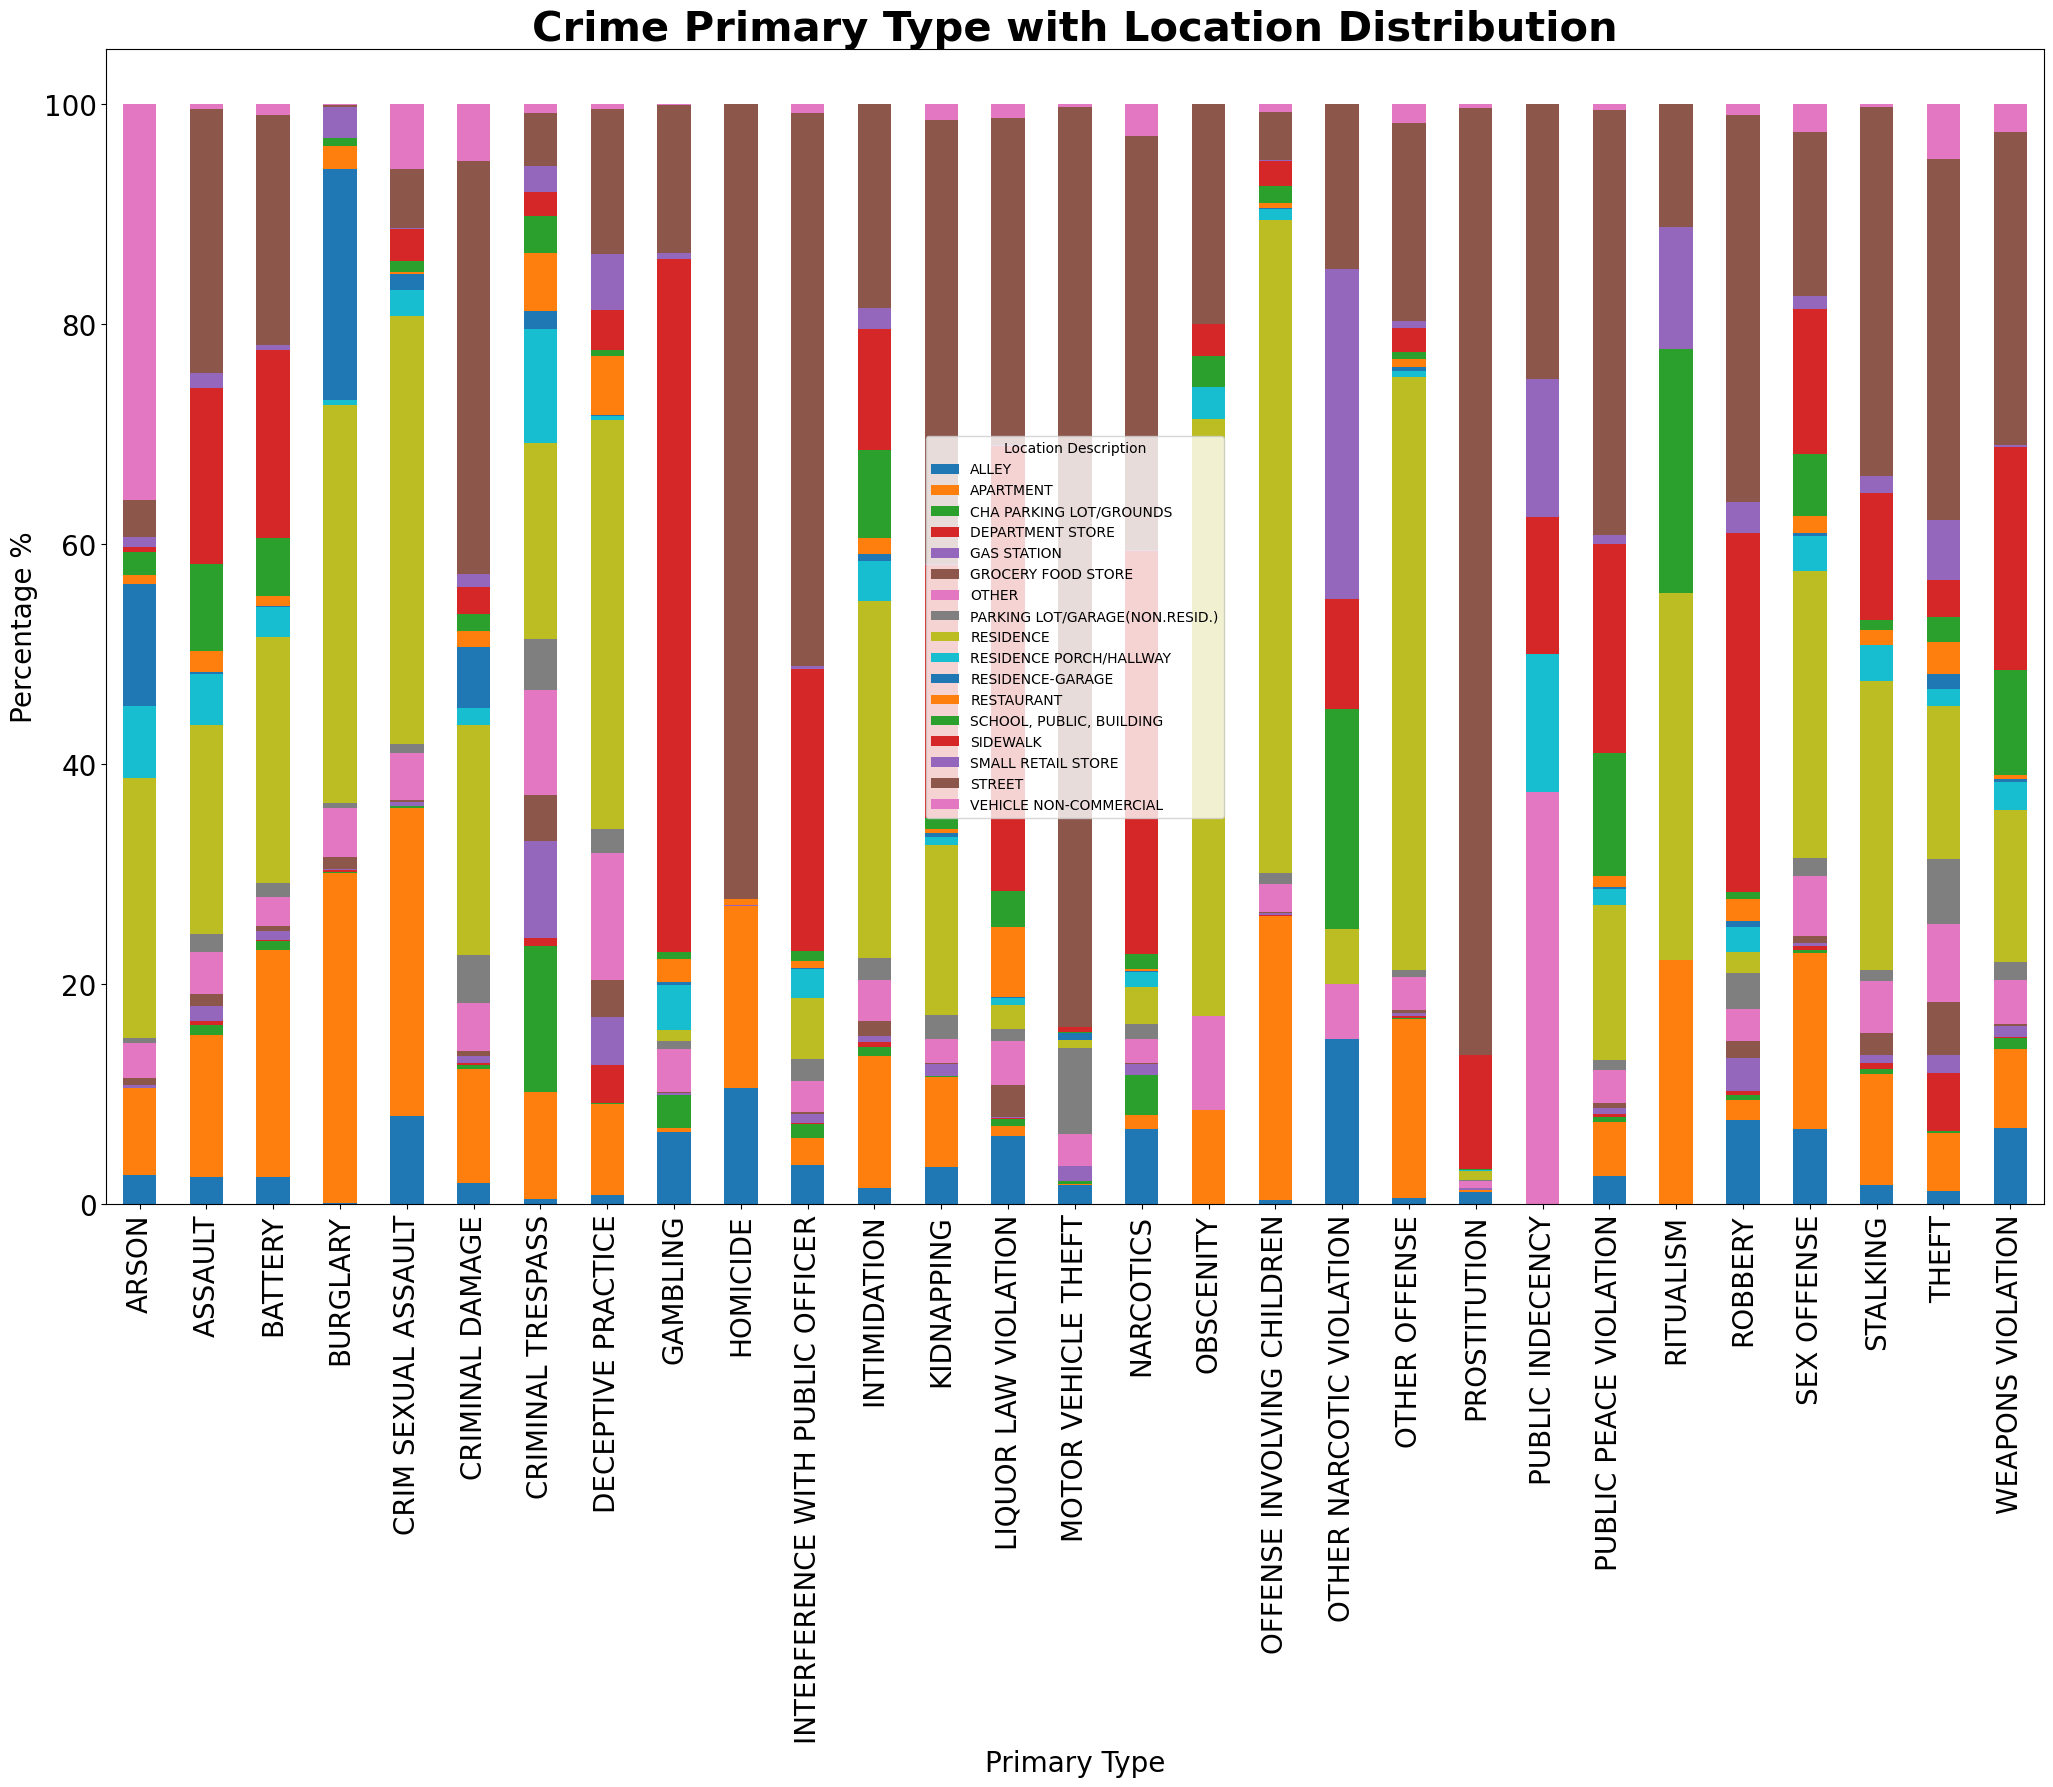

In [83]:
cross.plot(kind = "bar", figsize= (25, 15), stacked = True)

plt.ylabel("Percentage %", fontsize = 20)
plt.xlabel("Primary Type", fontsize = 20)
plt.title("Crime Primary Type with Location Distribution", fontsize = 30, fontweight = "bold")
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20);  # Increase y-axis tick label size;


##### Analysing the police district that intervenes in the crime types 

In [49]:
selected_col = df1[[ 'Primary Type', 'Location Description', 'District']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Primary Type,Location Description,District
0,OTHER OFFENSE,RESIDENCE,16.0
1,NARCOTICS,SIDEWALK,3.0
2,ASSAULT,OTHER,3.0
3,BATTERY,RESIDENCE,16.0
4,NARCOTICS,ALLEY,8.0
...,...,...,...
1872336,CRIMINAL DAMAGE,RESIDENCE,7.0
1872337,ASSAULT,ALLEY,8.0
1872338,BATTERY,"SCHOOL, PUBLIC, BUILDING",11.0
1872339,CRIMINAL DAMAGE,"SCHOOL, PUBLIC, BUILDING",16.0


In [50]:
cross = pd.crosstab(filtered_df["District"], filtered_df["Primary Type"], normalize = "index") * 100
cross

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
District,,,,,,,,,,,,,,,,,,,,,
1.0,0.012393,4.009047,10.239489,1.530502,0.096044,7.392261,8.296930,4.783592,0.052669,0.009295,...,4.588407,0.148713,0.000000,0.387273,0.000000,2.565294,0.216873,0.037178,42.488459,0.260247
2.0,0.074658,6.881963,20.586546,6.194724,0.380949,10.750794,3.719515,2.320150,0.262261,0.093801,...,6.426356,1.983231,0.001914,0.350320,0.000000,4.898733,0.306290,0.030629,17.368582,0.788698
3.0,0.129384,6.657940,21.652764,6.435704,0.423161,12.216878,4.756758,1.837250,0.403373,0.112640,...,6.790368,0.712372,0.001522,0.590599,0.001522,4.647163,0.296822,0.048709,12.436069,0.881332
4.0,0.180734,7.375941,20.942379,6.213266,0.412700,14.031792,2.313965,1.975266,0.256158,0.078271,...,7.188091,0.432623,0.000000,0.572087,0.002846,3.941994,0.298852,0.064040,14.675035,1.189714
5.0,0.173295,7.660700,22.417551,5.579376,0.444849,13.279380,2.106335,1.506056,0.266195,0.117912,...,6.461929,0.986172,0.001787,0.382320,0.001787,3.950048,0.300139,0.064316,11.237360,1.393504
6.0,0.107149,6.801167,21.171876,5.784658,0.413089,11.518561,2.815492,2.151447,0.360924,0.094461,...,6.829365,0.437057,0.001410,0.487812,0.001410,5.067039,0.270693,0.070493,15.319545,0.936147
7.0,0.181666,7.445696,25.705100,6.038111,0.449591,11.727266,1.659827,1.182790,0.499255,0.096714,...,5.555846,1.397130,0.000000,0.392085,0.000000,3.852890,0.324124,0.028753,11.668453,1.359228
8.0,0.235346,5.986699,17.040957,7.284032,0.345409,16.514062,1.751633,2.565394,0.194366,0.067911,...,6.692738,1.744608,0.000000,1.033885,0.000000,3.887315,0.374681,0.039810,17.240007,0.836007
9.0,0.233630,6.138087,19.484381,6.551431,0.370867,14.220363,2.069991,1.837995,0.362698,0.101294,...,5.741080,3.006143,0.000000,1.225330,0.000000,3.107437,0.408443,0.026140,16.038753,1.124036


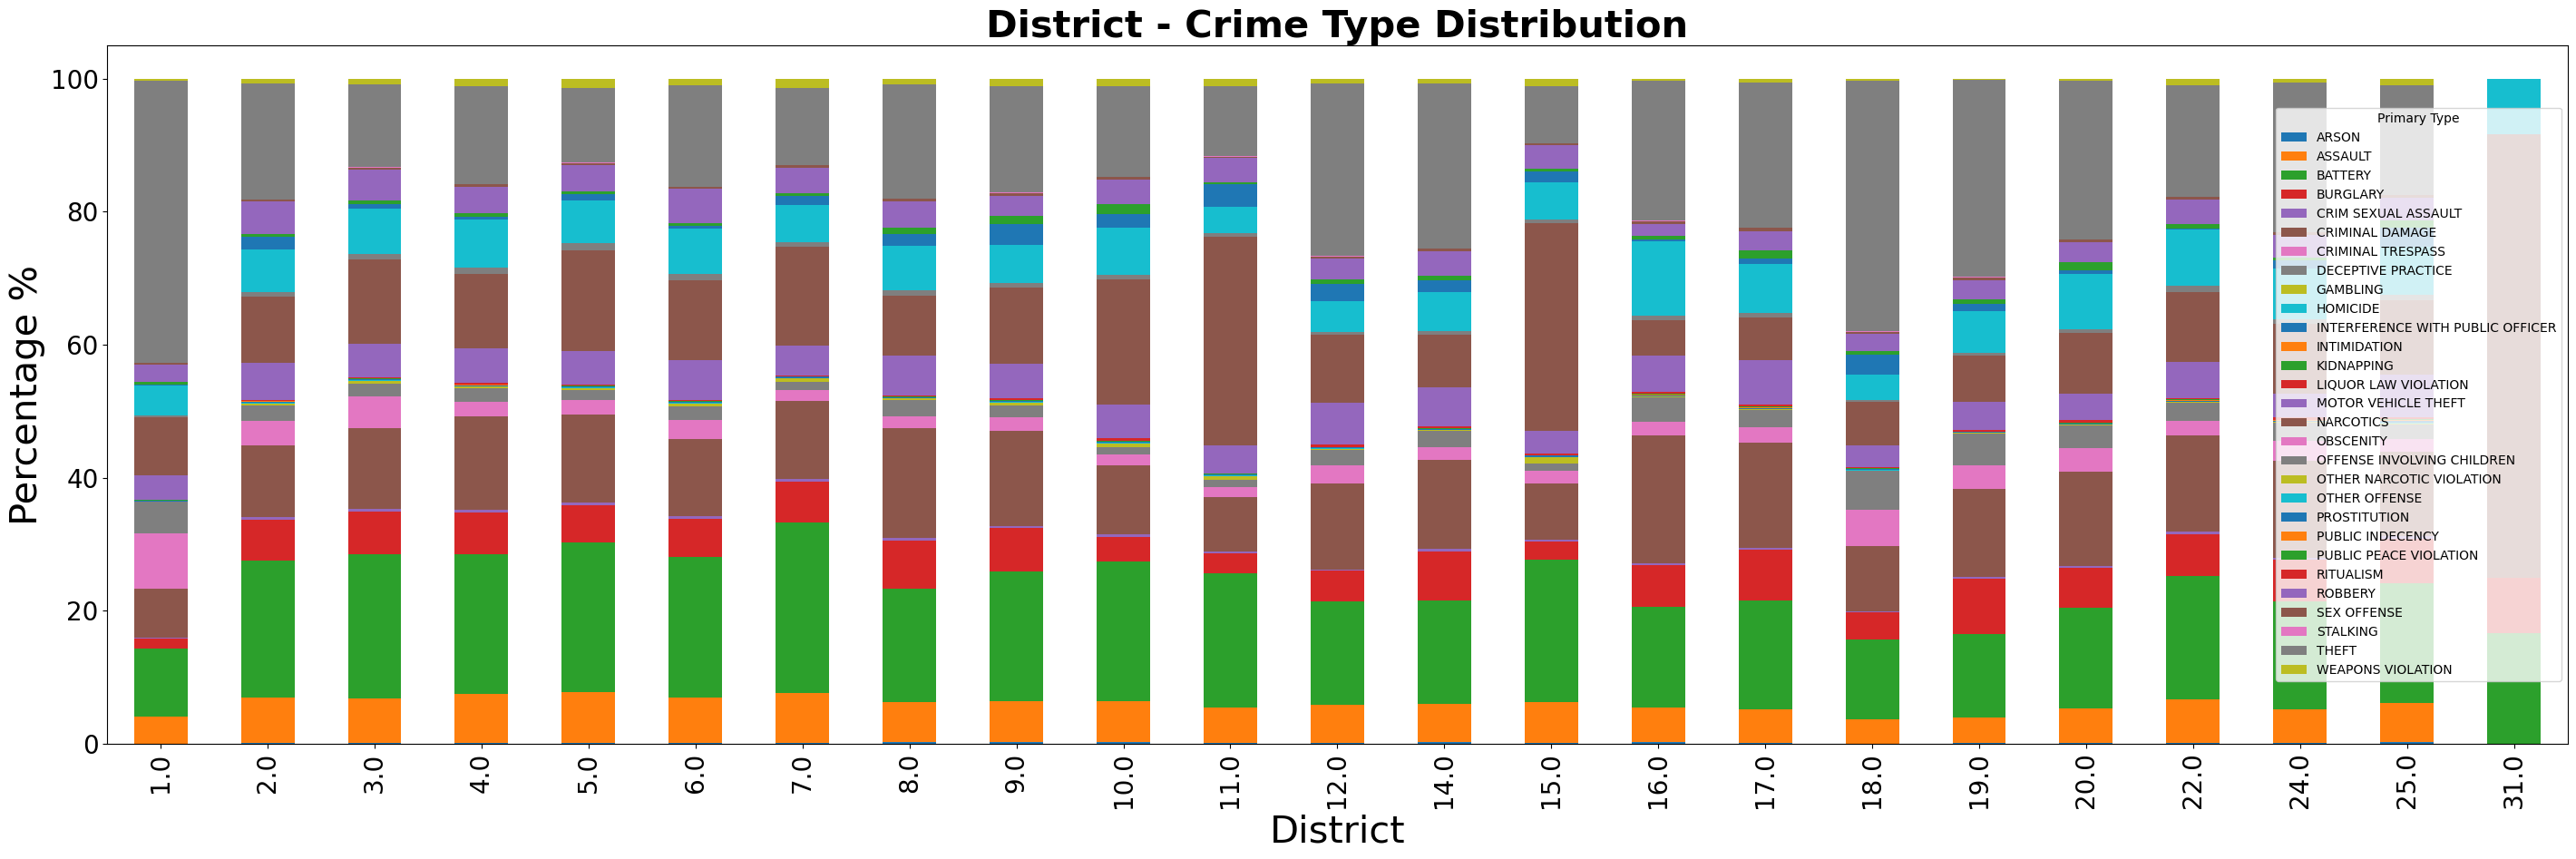

In [51]:
cross.plot(kind = "bar", figsize = (35, 10), stacked = True)
plt.title("District - Crime Type Distribution", fontsize = 30, fontweight = "bold")
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("District", fontsize = 30)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  ;# Increase y-axis tick label size


#### From the graph above, it shows the District distribution in different crime scenes

#### Analysing what kind of crime do causes arrest

In [52]:
selected_col = df1[[ 'Primary Type', 'Location Description', 'District', 'Year', 'Arrest']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Primary Type,Location Description,District,Year,Arrest
0,OTHER OFFENSE,RESIDENCE,16.0,2006,False
1,NARCOTICS,SIDEWALK,3.0,2006,True
2,ASSAULT,OTHER,3.0,2006,False
3,BATTERY,RESIDENCE,16.0,2006,False
4,NARCOTICS,ALLEY,8.0,2006,True
...,...,...,...,...,...
1872336,CRIMINAL DAMAGE,RESIDENCE,7.0,2006,False
1872337,ASSAULT,ALLEY,8.0,2006,True
1872338,BATTERY,"SCHOOL, PUBLIC, BUILDING",11.0,2006,False
1872339,CRIMINAL DAMAGE,"SCHOOL, PUBLIC, BUILDING",16.0,2006,False


In [53]:
cross = pd.crosstab(filtered_df["Primary Type"], filtered_df["Arrest"]) 
cross

Arrest,False,True
Primary Type,,
ARSON,1637,291
ASSAULT,54155,17169
BATTERY,169926,52330
BURGLARY,63407,3813
CRIM SEXUAL ASSAULT,3310,675
CRIMINAL DAMAGE,138547,10174
CRIMINAL TRESPASS,7736,23721
DECEPTIVE PRACTICE,22950,4715
GAMBLING,39,3497


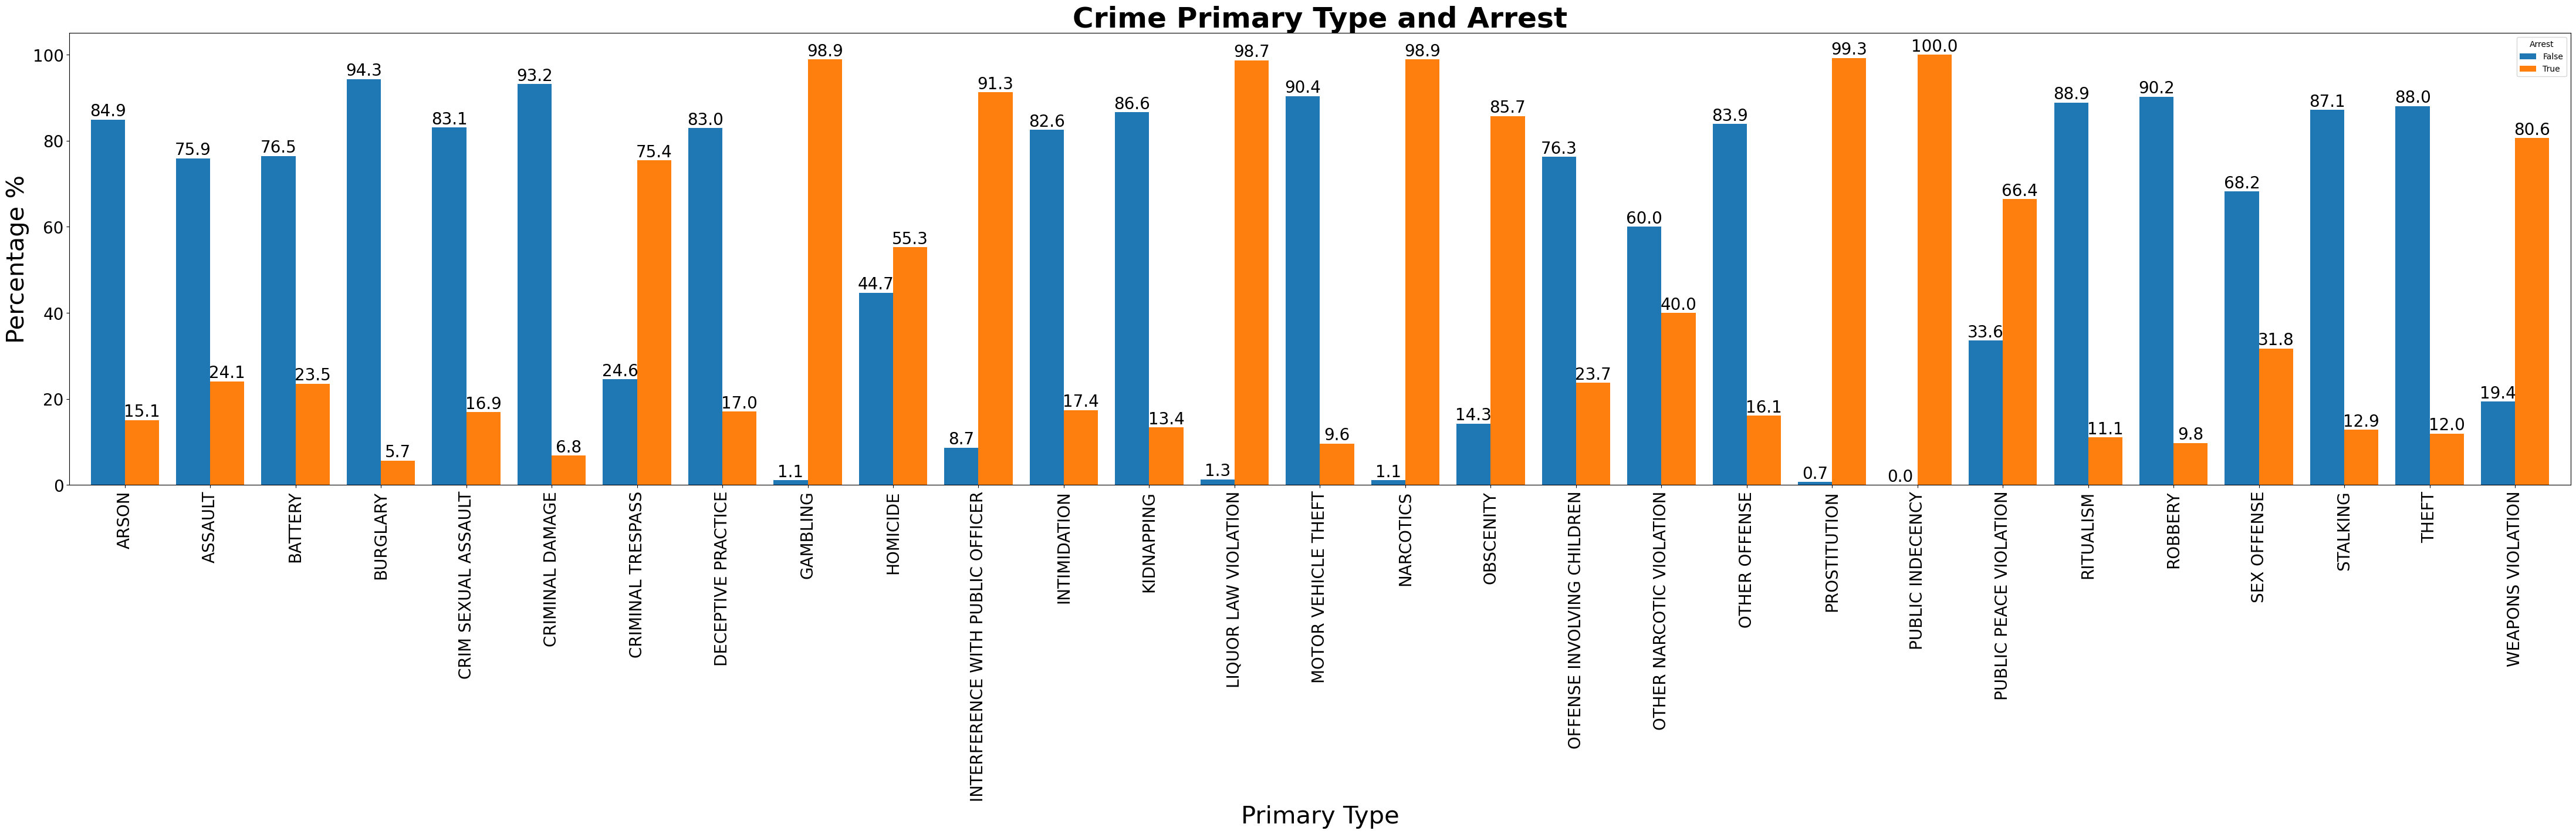

In [54]:
cross = pd.crosstab(filtered_df["Primary Type"], filtered_df["Arrest"], normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (55, 10), width = 0.8)

plt.title("Crime Primary Type and Arrest", fontsize = 35, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Primary Type", fontsize = 30)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  ;# Increase y-axis tick label size

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='edge', fontsize=20)

####  Analysing the crime type and how it increases over the years

In [55]:
selected_col = df1[[ 'Primary Type', 'Location Description', 'District', 'Year', 'Arrest']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Primary Type,Location Description,District,Year,Arrest
0,OTHER OFFENSE,RESIDENCE,16.0,2006,False
1,NARCOTICS,SIDEWALK,3.0,2006,True
2,ASSAULT,OTHER,3.0,2006,False
3,BATTERY,RESIDENCE,16.0,2006,False
4,NARCOTICS,ALLEY,8.0,2006,True
...,...,...,...,...,...
1872336,CRIMINAL DAMAGE,RESIDENCE,7.0,2006,False
1872337,ASSAULT,ALLEY,8.0,2006,True
1872338,BATTERY,"SCHOOL, PUBLIC, BUILDING",11.0,2006,False
1872339,CRIMINAL DAMAGE,"SCHOOL, PUBLIC, BUILDING",16.0,2006,False


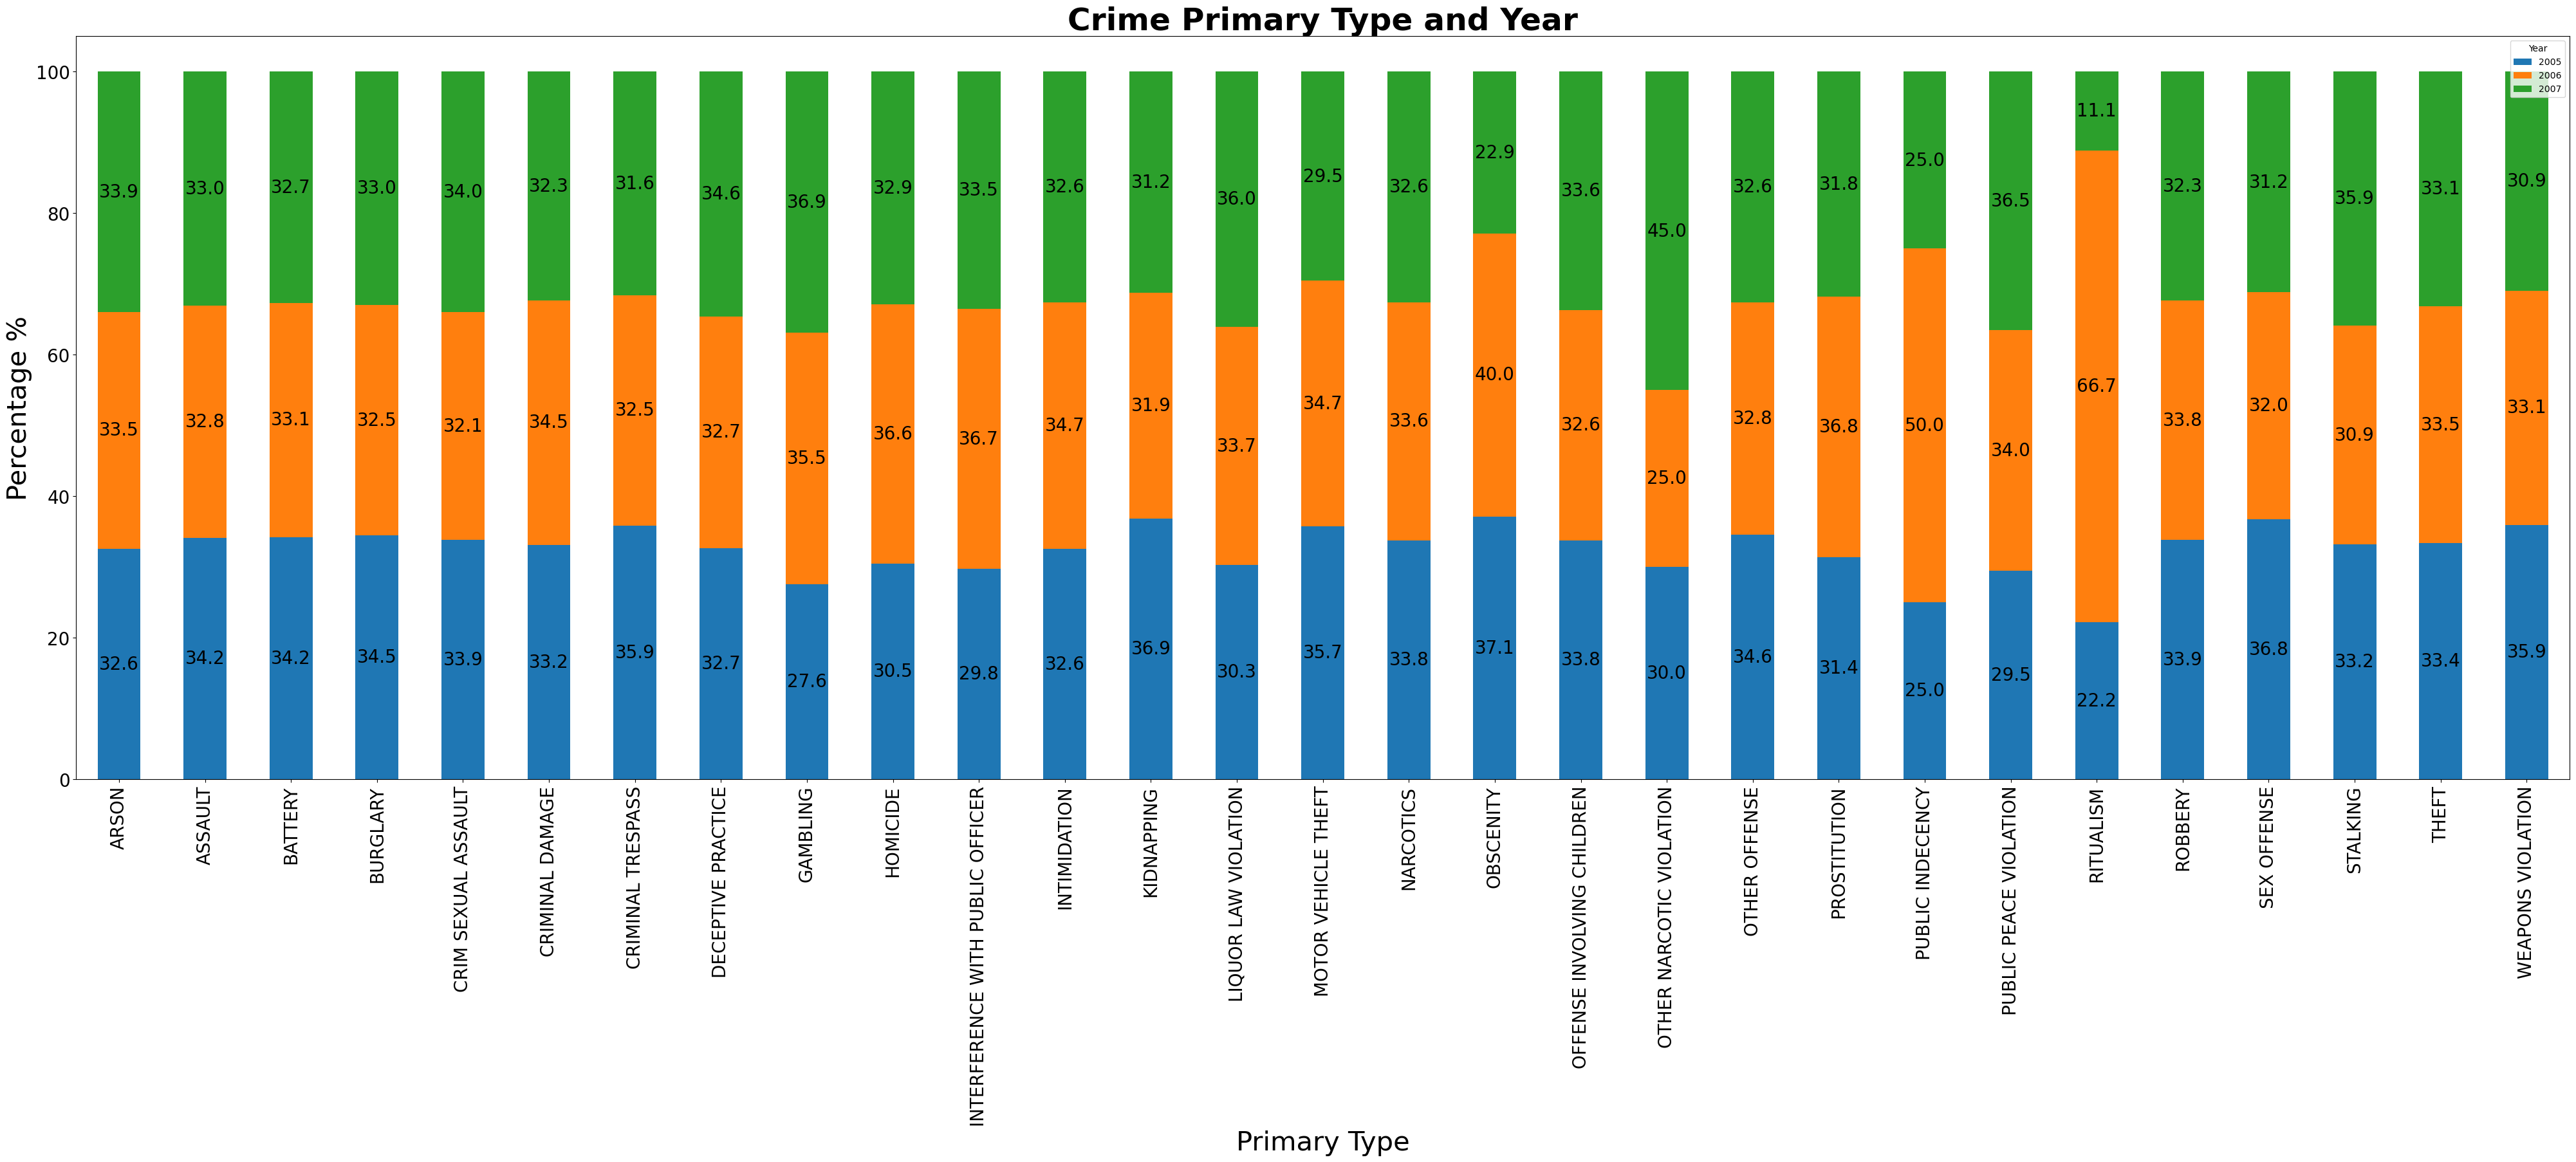

In [56]:
cross = pd.crosstab(filtered_df["Primary Type"], filtered_df["Year"], normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (50, 15), stacked = True)

plt.title("Crime Primary Type and Year", fontsize = 35, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Primary Type", fontsize = 30)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  ;# Increase y-axis tick label size

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='center', fontsize=20)

#### The graph above shows the crime type rate commited over the years.
#### we can note that Ritualism seems to be on the high rate in the year 2006. 

### The Arrest Distribution

In [57]:
df1.Arrest.value_counts()

Arrest
False    930540
True     408078
Name: count, dtype: int64

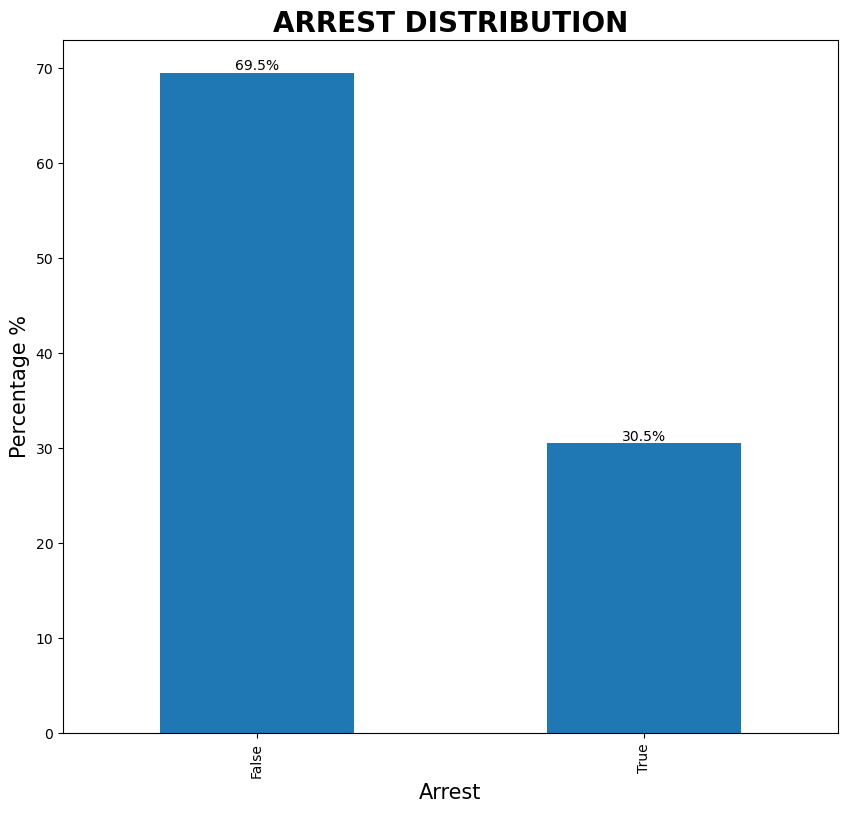

In [58]:
count = df1.Arrest.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", figsize = (10, 9))
plt.ylabel("Percentage %", fontsize = 15)
plt.xlabel("Arrest", fontsize = 15)
plt.title("ARREST DISTRIBUTION", fontsize = 20, fontweight = "bold")
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')

### Analyzing the rate of Arrest during the years 

In [59]:
cross = pd.crosstab(df1.Year, df1.Arrest)
cross

Arrest,False,True
Year,,
2005,312779,140886
2006,312663,135371
2007,305098,131821


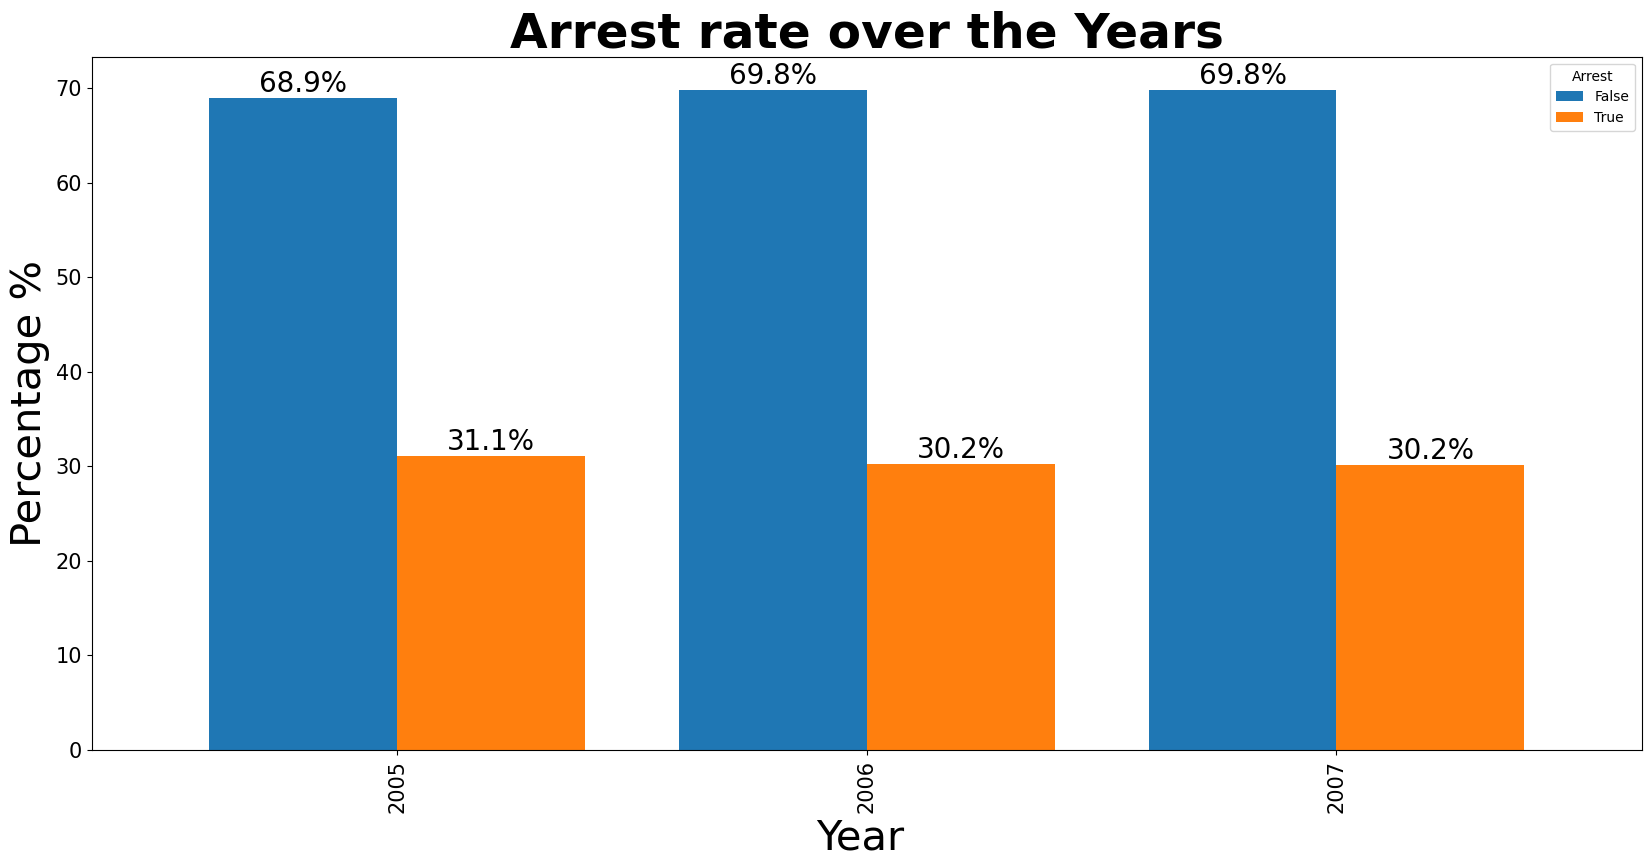

In [60]:
cross = pd.crosstab(df1.Year, df1.Arrest, normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (20, 9), width = 0.8)

plt.title("Arrest rate over the Years", fontsize = 35, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Year ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=20)

#### Analyzing the Distrinct police that made most of the Arrest

In [61]:
pd.crosstab(df1.District, df1.Arrest)

Arrest,False,True
District,,
1.0,31338,18951
2.0,43060,18447
3.0,48829,22061
4.0,57889,18526
5.0,44710,16416
6.0,56322,21432
7.0,57705,24690
8.0,70088,24608
9.0,46098,21968


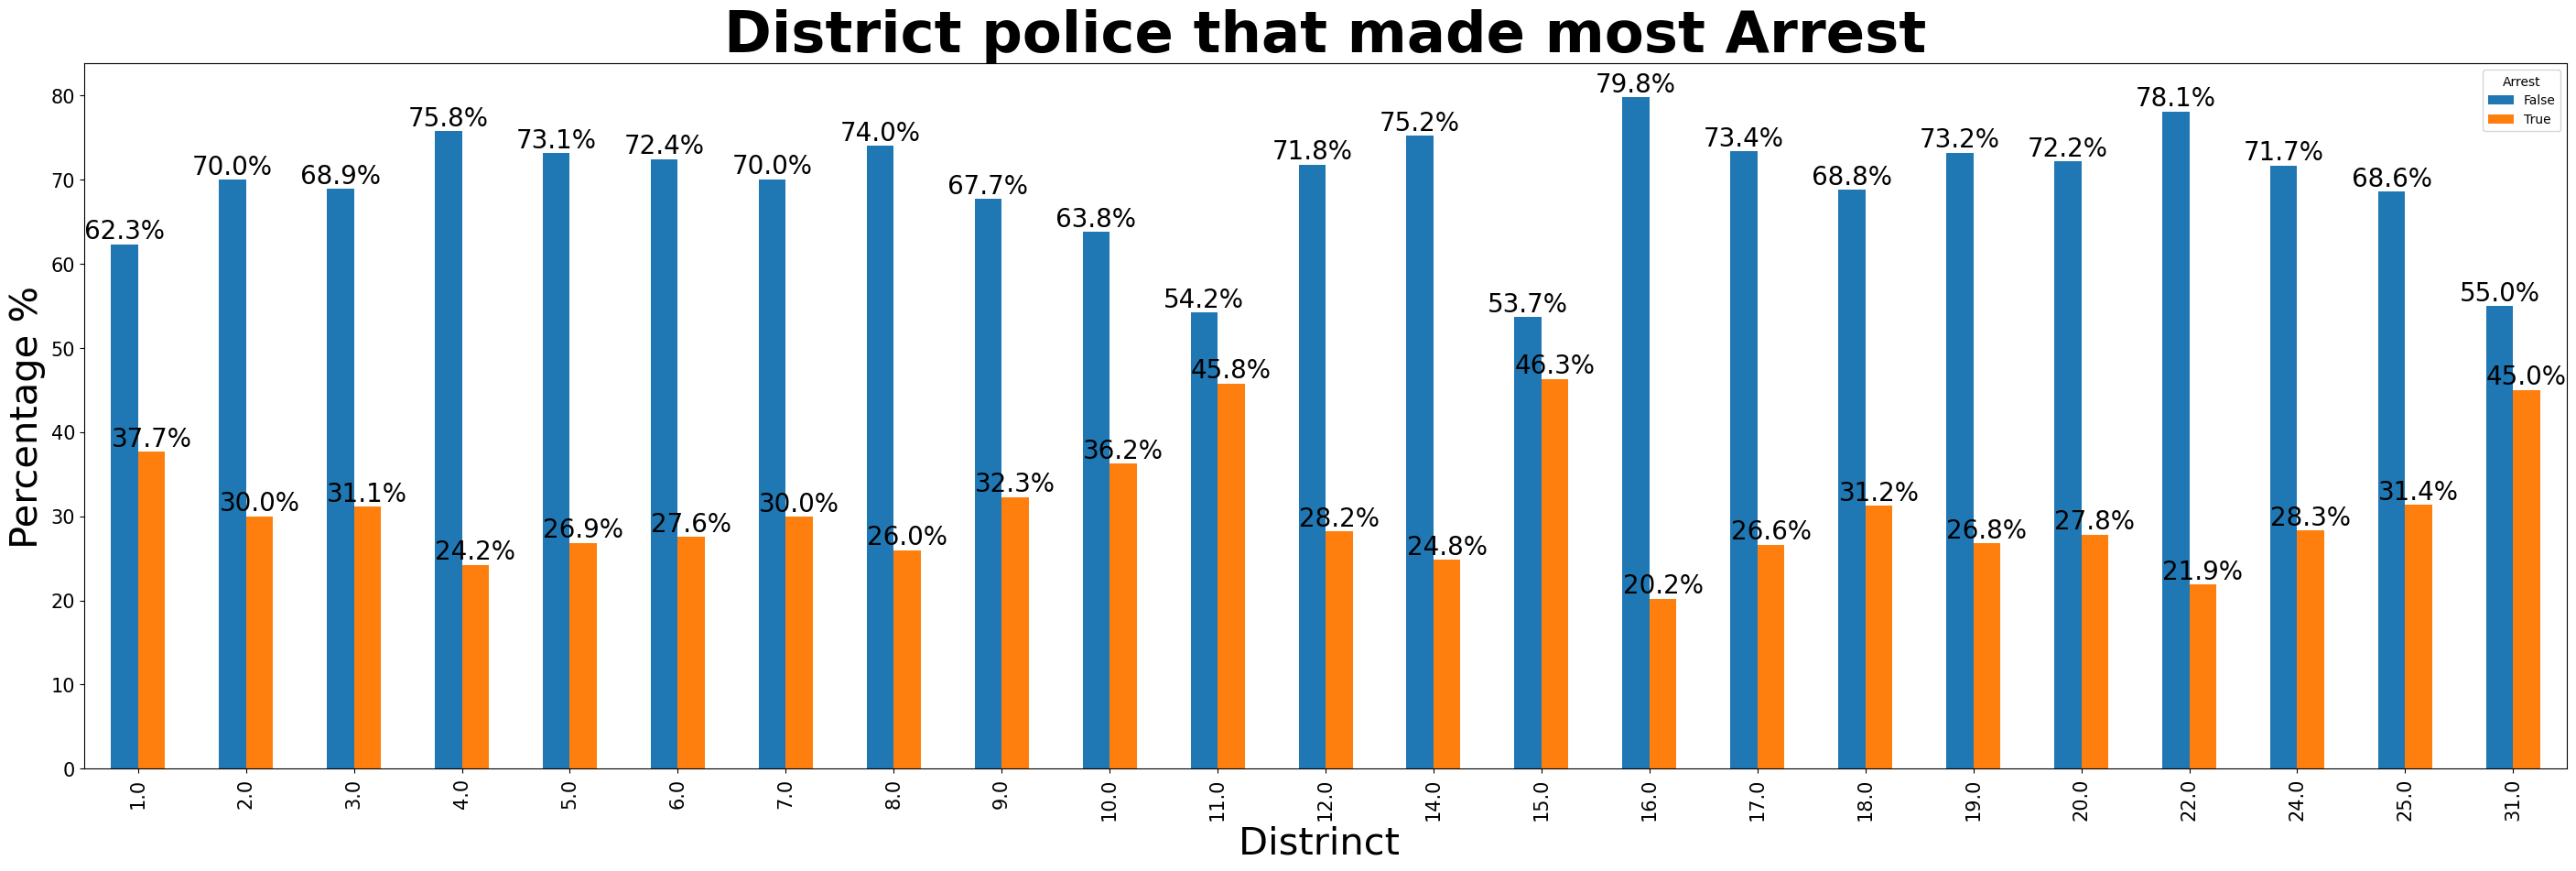

In [62]:
# cross = pd.crosstab(df1.District, df1.Arrest, normalize = "index").iloc[:, [1]]*100
cross = pd.crosstab(df1.District, df1.Arrest, normalize = "index")*100

bars = cross.plot(kind = "bar", figsize = (35, 10))

plt.title("District police that made most Arrest", fontsize = 45, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Distrinct ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=20)

### analyzing the ward where most arrest was made

In [63]:
cross = pd.crosstab(df1.Ward, df1.Arrest)
cross

Arrest,False,True
Ward,,
1.0,18923,6179
2.0,32434,18420
3.0,25651,18863
4.0,18596,7984
5.0,23720,8547
6.0,31505,11896
7.0,26459,9335
8.0,27755,8657
9.0,24628,8789


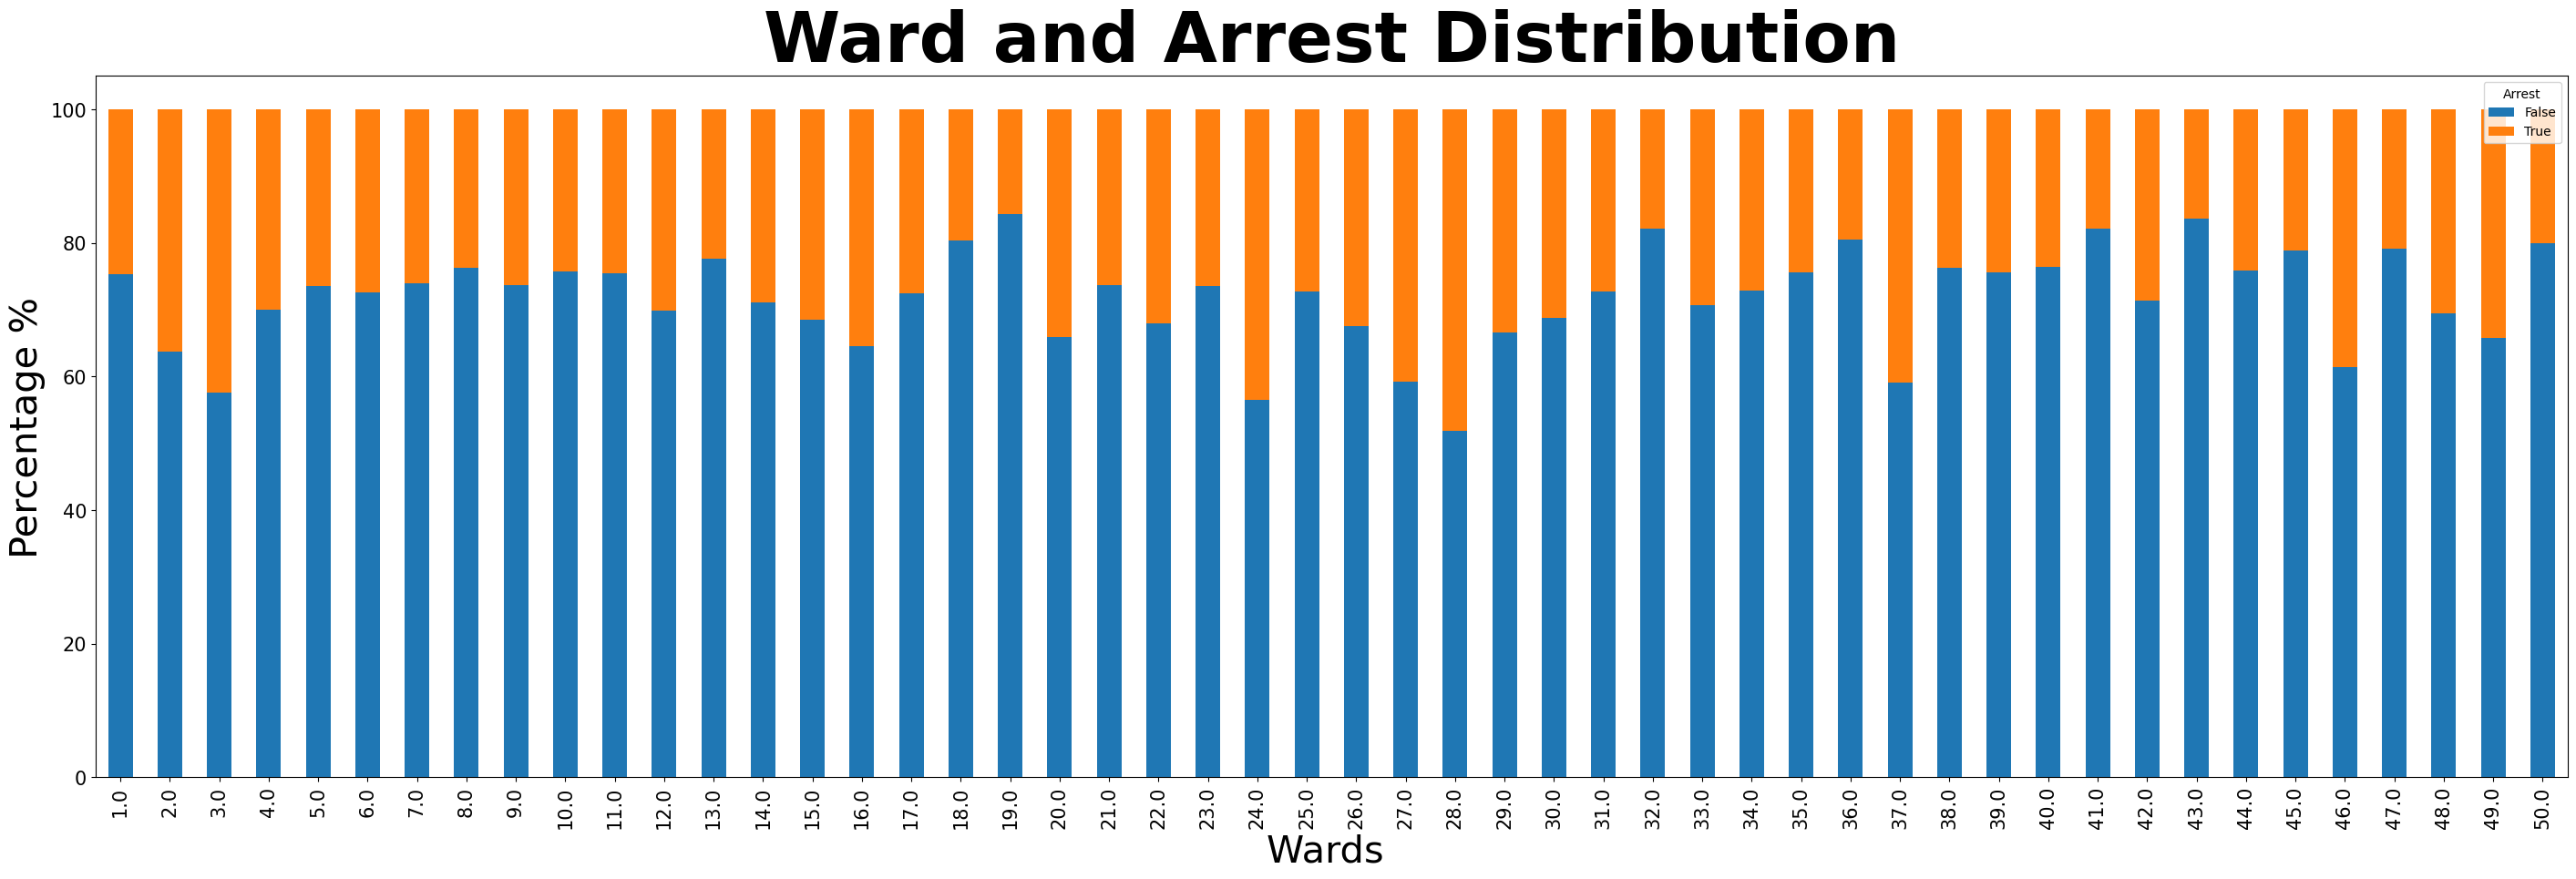

In [64]:
cross = pd.crosstab(df1.Ward, df1.Arrest, normalize = "index") * 100

bars = cross.plot(kind = "bar", figsize = (35, 10), stacked = True)

plt.title("Ward and Arrest Distribution", fontsize = 55, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Wards ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center', fontsize=20)

#### Analyzing the police district that makes most arrests(ie Arrest == True) in different wards

In [65]:
selected_col = df1[[ 'Ward', 'District', 'Arrest']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
# filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

filtered_df = selected_col[selected_col['Arrest'] == True]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Ward,District,Arrest
1,20.0,3.0,True
4,13.0,8.0,True
5,17.0,7.0,True
6,45.0,16.0,True
11,3.0,1.0,True
...,...,...,...
1872321,16.0,9.0,True
1872325,38.0,16.0,True
1872330,9.0,5.0,True
1872331,15.0,7.0,True


In [66]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District)
cross.iloc[:5]

District,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,22.0,24.0,25.0,31.0
Ward,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1135,0,0,0,0,0
2.0,6145,304,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
3.0,7297,7878,0,0,0,0,819,0,2869,0,...,0,0,0,0,0,0,0,0,0,0
4.0,140,7842,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5.0,0,764,7302,476,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


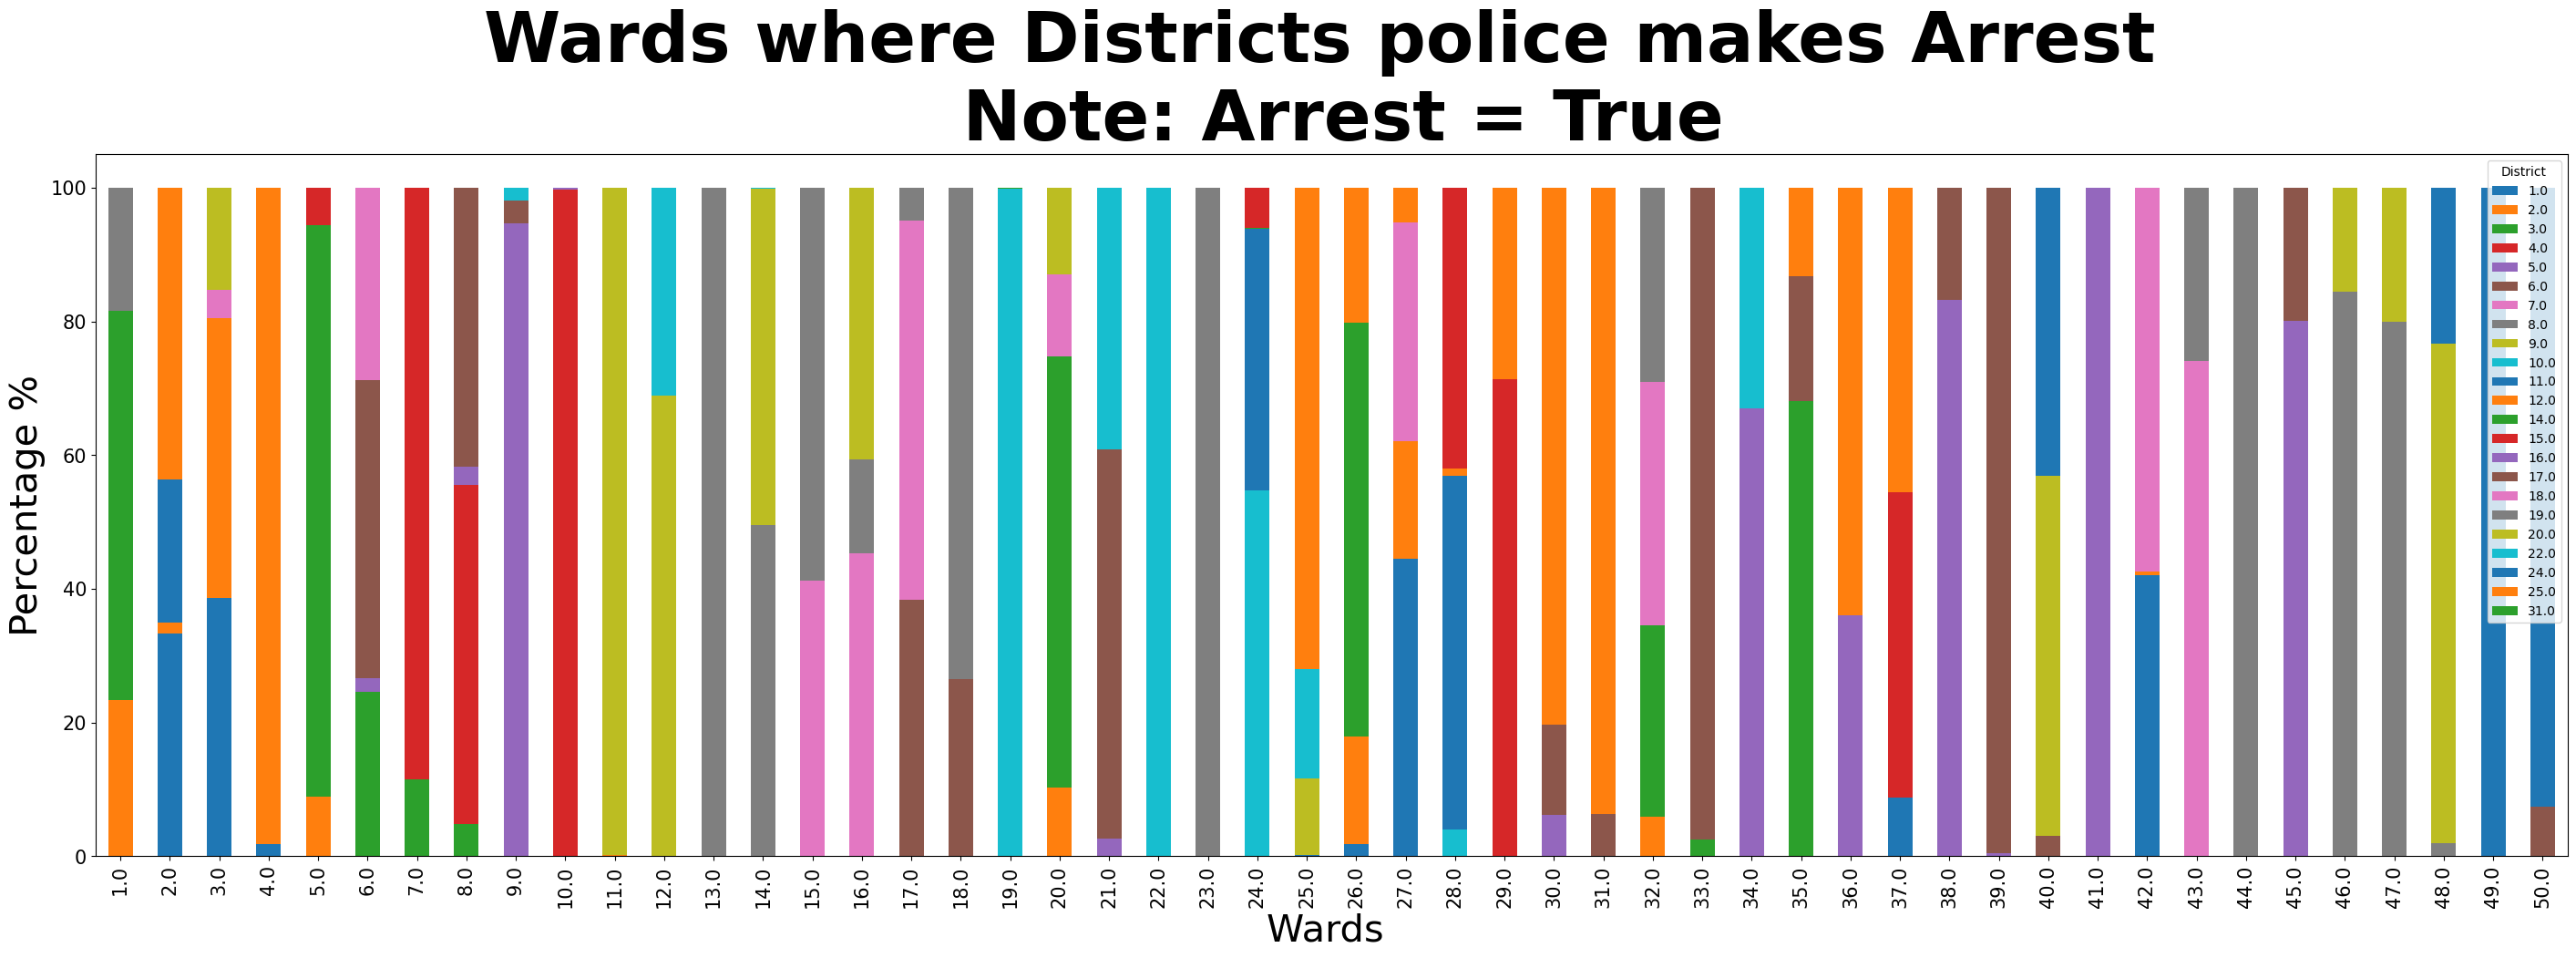

In [67]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District, normalize = "index") *100


bars = cross.plot(kind = "bar", figsize = (35, 10), stacked = True)

plt.title("Wards where Districts police makes Arrest \n Note: Arrest = True", fontsize = 55, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Wards ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center', fontsize=20)

#### Analyzing the Wards where the district police do not make Arrest (Arrest == False)

In [68]:
selected_col = df1[[ 'Ward', 'District', 'Arrest']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
# filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

filtered_df = selected_col[selected_col['Arrest'] == False]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Ward,District,Arrest
0,45.0,16.0,False
2,5.0,3.0,False
3,38.0,16.0,False
7,15.0,8.0,False
8,32.0,12.0,False
...,...,...,...
1872338,28.0,11.0,False
1872339,38.0,16.0,False
1872340,8.0,6.0,False
1872341,5.0,2.0,False


In [69]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District)
cross.iloc[:5]

District,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,22.0,24.0,25.0,31.0
Ward,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,823,0,0,0,0,0
2.0,14691,811,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3.0,3253,16169,0,0,0,0,1486,0,4743,0,...,0,0,0,0,0,0,0,0,0,0
4.0,686,17906,0,0,0,0,0,0,2,0,...,0,0,0,0,2,0,0,0,0,0
5.0,0,3675,18839,1192,0,13,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


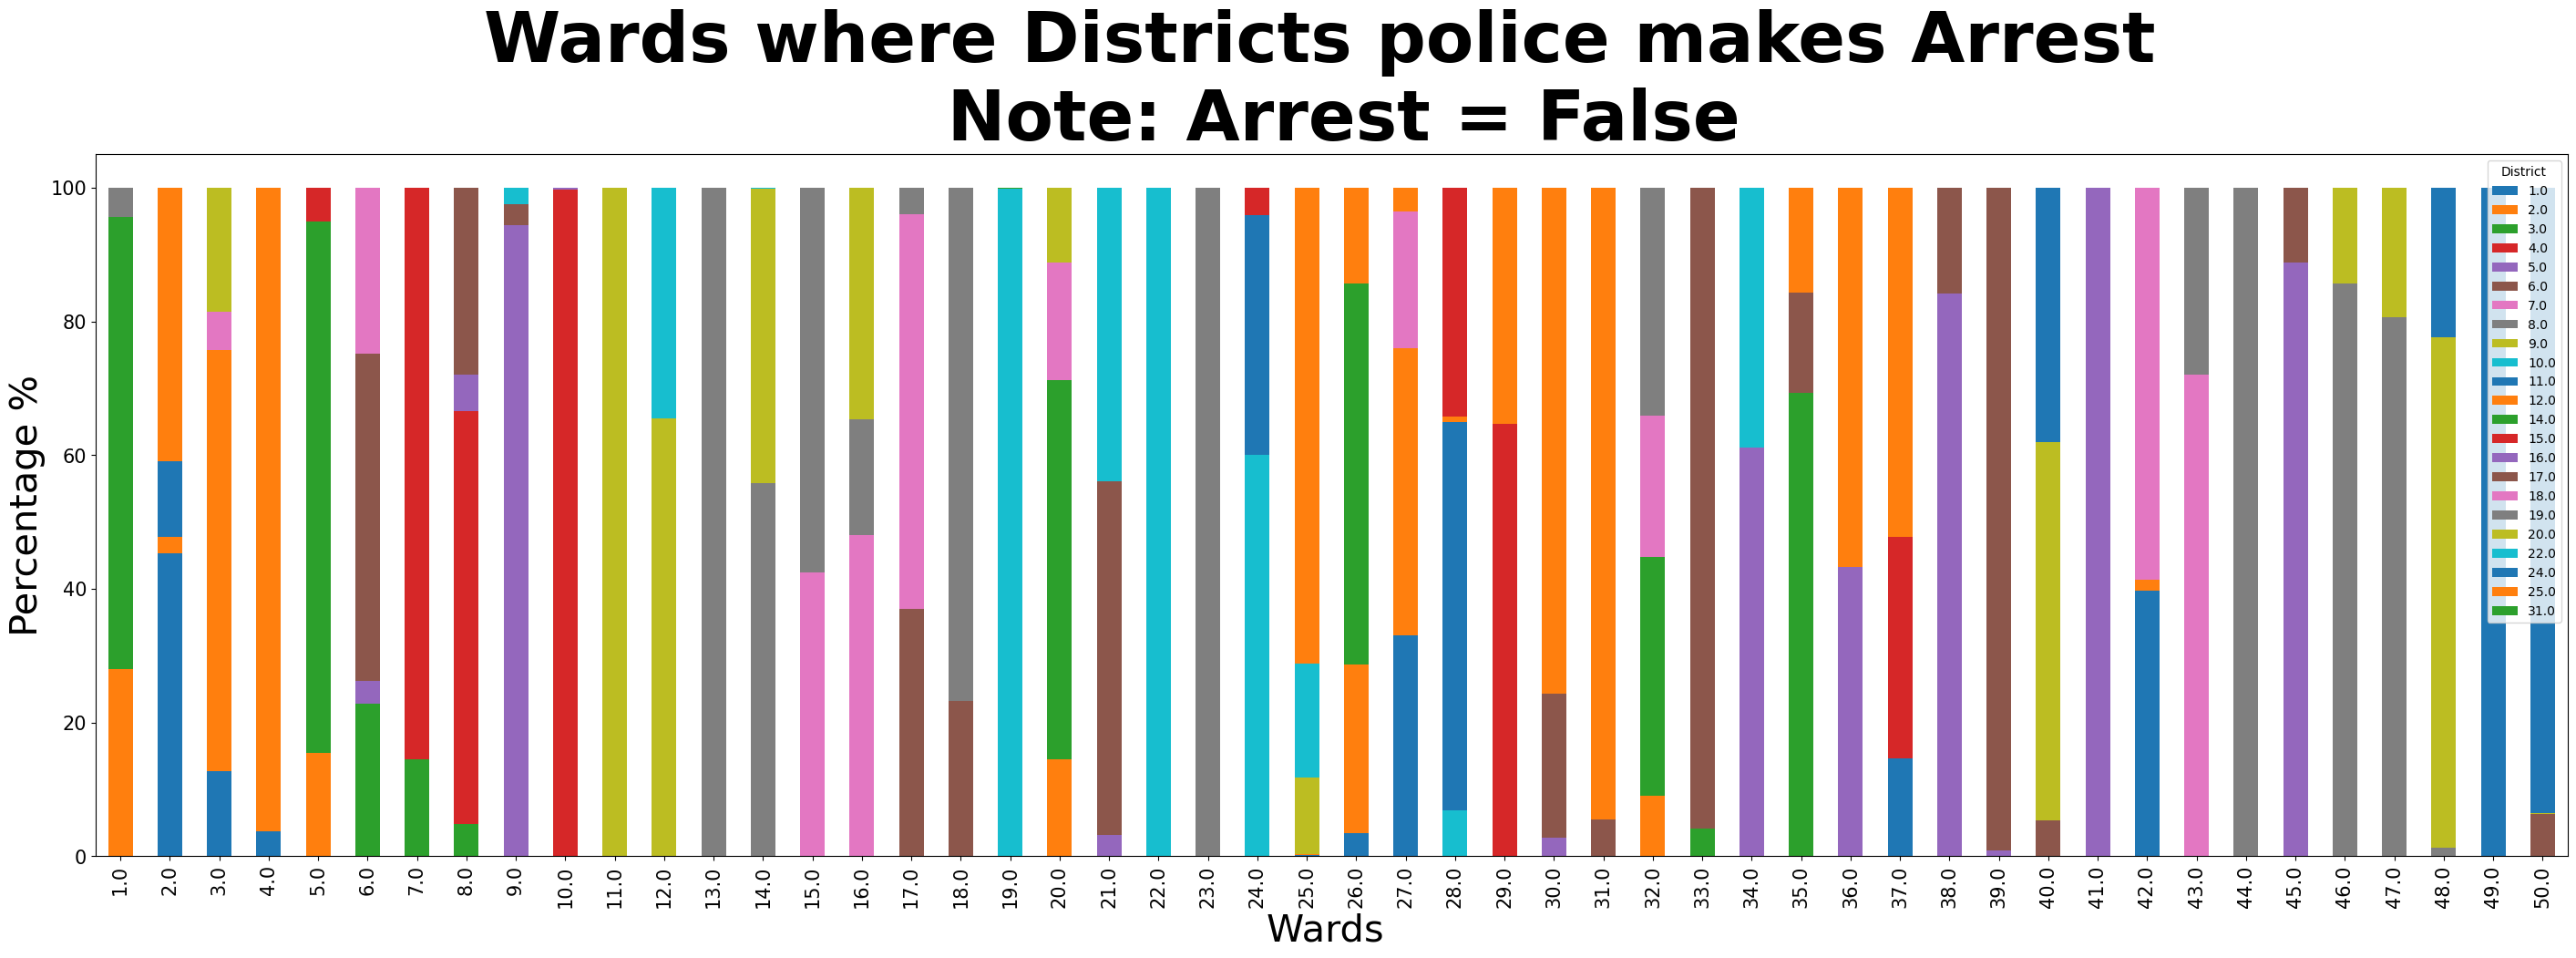

In [70]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District, normalize = "index") *100


bars = cross.plot(kind = "bar", figsize = (35, 10), stacked = True)

plt.title("Wards where Districts police makes Arrest \n Note: Arrest = False", fontsize = 55, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Wards ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center', fontsize=20)